# **Cyclistic Bike-Share Analysis**

Analyzed by,
<br>
**Arvy Nathaniel**

## Table of Contents
* [Intro](#Intro)
* [I. Preparation](#I)
    * [Ia. Libraries](#Ia)
    * [Ib. Dataframes](#Ib)
    * [Ic. Functions](#Ic)
    * [Id. Color Palette](#Id)
* [II. Data Exploration](#II)
    * [IIa. Dataframe](#IIa)
        * [a. General Overview](#IIa_a)
        * [b. Missing Values](#IIa_b)
        * [c. Duplicate Entries](#IIa_c)
        * [d. Unique Values](#IIa_d)
    * [IIb. Columns](#IIb)
        * [a. rideable_type](#IIb_a)
        * [b. start_station_id and start_station_name](#IIb_b)
        * [c. end_station_id and end_station_name](#IIb_c)
        * [d. member_casual](#IIb_d)
* [III. Data Cleaning and Engineering](#III)
    * [IIIa. Column: started_at](#IIIa)
    * [IIIb. Column: ended_at](#IIIb)
    * [IIIc. Column: trip_duration](#IIIc)
    * [IIId. Columns: start_station_id and start_station_name](#IIId)
    * [IIIe. Columns: end_station_id and end_station_name](#IIIe)
    * [IIIf. Data Cleaning and Engineering Log](#IIIf)
* [IV. Data Analysis](#IV)
    * [IVa. Type of Bike Preference](#IVa)
        * [a. Each Type of Bike Popularity](#IVa_a)
        * [b. Classic and Electric Bikes Popularity Growth](#IVa_b)
    * [IVb. Monthly Seasonality](#IVb)
        * [a. Trip Counts per Month](#IVb_a)
        * [b. Trip Volume Percentage on Busy Months](#IVb_b)
    * [IVc. Busy Hours](#IVc)
        * [a. Busy Hours in General](#IVc_a)
        * [b. Weekdays vs. Weekends](#IVc_b)
        * [c. Each Day](#IVc_c)
    * [IVd. Trip Duration](#IVd)
        * [a. Preparation: Further Outlier Trimming](#IVd_a)
        * [b. Member vs. Casual (Separated)](#IVd_b)
        * [c. Member vs. Casual (Combined)](#IVd_c)
    * [IVe. Busiest Stations](#IVe)
        * [a. Preparation: Pivoting data](#IVe_a)
        * [b. Top 25 Starting Stations for Members](#IVe_b)
        * [c. Top 25 Ending Stations for Members](#IVe_c)
        * [d. Top 25 Starting Stations for Casuals](#IVe_d)
        * [e. Top 25 Ending Stations for Casuals](#IVe_e)
    * [IVf. Busiest Stations Mapping](#IVf)
        * [a. Busiest Stations](#IVf_a)
        * [b. Busiest Stations Shared by Both Members and Casuals](#IVf_b)
    * [IVg. Most Popular Routes](#IVg)
        * [a. Preparation: Pivoting Data](#IVg_a)
        * [b. Top 10 Popular Routes for Members](#IVg_b)
        * [c. Top 10 Popular Routes for Casuals](#IVg_c)
        * [d. Popular Routes Shared by Both Members and Casuals](#IVg_d)
* [V. Summary and Recommendations](#V)
    * [Va. Summary](#Va)
        * [a. Types of Bike](#Va_a)
        * [b. Seasonality](#Va_b)
        * [c. Busy Hours](#Va_c)
        * [d. Trip Duration](#Va_d)
        * [e. Busiest Stations and Popular Routes](#Va_e)
    * [Vb. Recommendations and Outro](#Vb)
        * [a. Top 3 Recommendations](#Vb_a)
        * [b. Further Data Ideas to Develop the Project](#Vb_b)
        * [c. Outro](#Vb_c)

---
Welcome to my data analysis project!<a class = "anchor" id = "Intro"></a>
---

**Intro :**
<br>
In this project, we are going to do a data analysis project to help Cyclistic, a bike-sharing company tackle their business problem. Before stating what needs to be done, some contexts are needed. For background information, the company, which operates in Chicago, launched its bike-share service back in 2016, and it has been improving since. As of 2022, it now features more than 5800 bicycles and 600 docking stations. The marketing director of the company predicts that in order to improve the company's success, the company will mainly depend on maximizing the number of annual memberships. With that being said, she wants to convert as many company's casual riders into annual members.

**Business Goal :**
<br>
Converting the casual riders into annual members

**Project Tasks :**
1. Understand the difference in behaviours between casual riders and annual members
2. Understand why casual riders might want to purchase the annual membership plan
3. Help the marketing division utilize the digital media for their marketing tactics

## **I. Preparation**<a class = "anchor" id = "I"></a>

### **Ia. Libraries**<a class = "anchor" id = "Ia"></a>

In [1]:
# basic operations
import pandas as pd
import numpy as np

# graphs and plots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
import folium

# text formatter
from termcolor import colored

# datetime formatter
from datetime import datetime, timedelta
import calendar

### **Ib. Dataframes**<a class = "anchor" id = "Ib"></a>

In this project, we will be analyzing the available data for the past twelve months, from Sep 2021 until Aug 2022, which are spread across twelve separate .csv files. These files were downloaded from the company's data source. Let's call the dataframes, then concatenating them into one dataframe to analyze.

##### **Calling in the dataframes for the past 12 months**

In [2]:
# year 2022
df_2022_08 = pd.read_csv('../input/cyclistic-bikeshare-analysis-sep-2021-aug-2022/202208-divvy-tripdata.csv')
df_2022_07 = pd.read_csv('../input/cyclistic-bikeshare-analysis-sep-2021-aug-2022/202207-divvy-tripdata.csv')
df_2022_06 = pd.read_csv('../input/cyclistic-bikeshare-analysis-sep-2021-aug-2022/202206-divvy-tripdata.csv')
df_2022_05 = pd.read_csv('../input/cyclistic-bikeshare-analysis-sep-2021-aug-2022/202205-divvy-tripdata.csv')
df_2022_04 = pd.read_csv('../input/cyclistic-bikeshare-analysis-sep-2021-aug-2022/202204-divvy-tripdata.csv')
df_2022_03 = pd.read_csv('../input/cyclistic-bikeshare-analysis-sep-2021-aug-2022/202203-divvy-tripdata.csv')
df_2022_02 = pd.read_csv('../input/cyclistic-bikeshare-analysis-sep-2021-aug-2022/202202-divvy-tripdata.csv')
df_2022_01 = pd.read_csv('../input/cyclistic-bikeshare-analysis-sep-2021-aug-2022/202201-divvy-tripdata.csv')

# year 2021
df_2021_12 = pd.read_csv('../input/cyclistic-bikeshare-analysis-sep-2021-aug-2022/202112-divvy-tripdata.csv')
df_2021_11 = pd.read_csv('../input/cyclistic-bikeshare-analysis-sep-2021-aug-2022/202111-divvy-tripdata.csv')
df_2021_10 = pd.read_csv('../input/cyclistic-bikeshare-analysis-sep-2021-aug-2022/202110-divvy-tripdata.csv')
df_2021_09 = pd.read_csv('../input/cyclistic-bikeshare-analysis-sep-2021-aug-2022/202109-divvy-tripdata.csv')

##### **Concatenating all 12 dataframes into a single dataframe**

In [3]:
# compiling the dataframes in a list
list_df = [df_2021_09,
           df_2021_10,
           df_2021_11,
           df_2021_12,
           df_2022_01,
           df_2022_02,
           df_2022_03,
           df_2022_04,
           df_2022_05,
           df_2022_06,
           df_2022_07,
           df_2022_08]

In [4]:
# concatenating the dataframes vertically into a single dataframe
df = pd.concat(list_df, axis = 0, ignore_index = True)

In [5]:
# checking the shape of the concatenated dataframe
print('Concatenated dataframe shape :', df.shape)

Concatenated dataframe shape : (5883043, 13)


##### **Checking the column names and number of rows of the concatenated dataframe**

In [6]:
# checking each dataframe's shape
list_shape = []
for dataframe in list_df:
    shape = dataframe.shape
    list_shape.append(shape)
    
# displaying the shape of each dataframes
print('The shape of each dataframe:')
list_shape

The shape of each dataframe:


[(756147, 13),
 (631226, 13),
 (359978, 13),
 (247540, 13),
 (103770, 13),
 (115609, 13),
 (284042, 13),
 (371249, 13),
 (634858, 13),
 (769204, 13),
 (823488, 13),
 (785932, 13)]

In [7]:
# checking if the column names from the concatenated dataframe match their previous names
df.columns == df_2022_08.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [8]:
# cross-checking the number of rows in the new dataframe with the separate dataframes

# calculating the total rows from the separate dataframes
list_row_num = []
for i in range(0,12):
    row_num = list_shape[i][0]
    list_row_num.append(row_num)
separate_df_row = sum(list_row_num)

# returning the number of rows from the concatenated dataframe
concatenated_df_row = df.shape[0]

# checking if the number of rows match between the concatenated and separate dataframes
result = separate_df_row == concatenated_df_row

# displaying the result
print('The number of rows from the concatenated dataframe matches the sum of rows in all separate dataframes ->', result)

The number of rows from the concatenated dataframe matches the sum of rows in all separate dataframes -> True


### **Ic. Functions**<a class = "anchor" id = "Ic"></a>

In [9]:
def missing_values_perc(df):
    # a function to return each datafame column's missing value 
    # count and its percentange

    # calculating the missing values for each column
    missing_values = df.isnull().sum()

    # turning the previous output into a dataframe format
    missing_values = pd.DataFrame(missing_values)
    missing_values = missing_values.reset_index()
    missing_values.columns = ['Column', 'Count']

    # calculating each feature's missing values percentage
    list_missing_values = []
    for i in missing_values['Count']:
        missing_values_perc = i / len(df) * 100 # Total entries = 100000 (from previous step)
        list_missing_values.append(missing_values_perc)
    list_missing_values = [round(num, 2) for num in list_missing_values]

    # adding the missing values percentage column to the report
    missing_values['Percentage (%)'] = list_missing_values

    # displaying the missing values report
    print('Missing values on each column : ', '\n')
    print(missing_values.to_string(index = False))

In [10]:
def unique_value_report(df, col):
    # a function to return each unique value, its count,
    # and its percentage in a column of a dataframe
    
    # defining variables that can be used outside of this function
    global table
    
    # storing unique value items of the column in a list
    list_unique = df[col].unique()
    list_unique = [i for i in list_unique if type(i) is not float]
    
    # storing the count of each unique value in a list
    total_rows = len(df)
    list_unique_count = []
    list_unique_perc = []
    for i in list_unique:
        count_unique = (df[col] == i).sum()
        unique_perc = (count_unique / total_rows) * 100
        list_unique_count.append(count_unique)
        list_unique_perc.append(unique_perc)
        
    # displaying the report in a table
    table = pd.DataFrame(list(zip(list_unique, 
                                  list_unique_count, 
                                  list_unique_perc)))
    table.columns = [col, 'Count', 'Percentage (%)']
    table.sort_values('Count', ascending = False, inplace = True)
    display(table)

In [11]:
def outlier_bounds(df, col):
    # a function to return a report about a column's outlier bounds
    
    # creating Q1 and Q3 table
    table = pd.DataFrame(df[col].quantile([0.25, 0.75])).reset_index()
    table = table.rename(columns = {'index': 'Quantile'},
                         index = {0: 'Q1', 1: 'Q3'})
    display(table)
    
    # calculating Interquartile Range (IQR)
    IQR = table[col][1] - table[col][0]
    print('IQR of', col, ':', IQR)
    print('1.5 IQR:', 1.5 * IQR, '\n')
    
    # calculating the lower bound
    # formula: Q1 - 1.5 * IQR
    lbound = table[col][0] - 1.5 * IQR
    print('Outlier lower bound of', col, ':', lbound)
    
    # counting lower outliers
    loutlier_count = len(df[df[col] < lbound])
    print('Count of', col, 'lower outliers:', loutlier_count, '\n')

    # calculating the upper boumd
    # formula: Q3 + 1.5 * IQR
    ubound = table[col][1] + 1.5 * IQR
    print('Outlier upper bound of', col, ':', ubound)
    
    # counting upper outliers
    uoutlier_count = len(df[df[col] > ubound])
    print('Count of', col, 'upper outliers:', uoutlier_count)

### **Id. Color Palette**<a class = "anchor" id = "Id"></a>

In [12]:
# color associated to members
color_m = '#DE8471'

# color associated to casuals
color_c = '#94ACBF'

## **II. Data Exploration**<a class = "anchor" id = "II"></a>

### **IIa. Dataframe**<a class = "anchor" id = "IIa"></a>

#### **a. General Overview**<a class = "anchor" id = "IIa_a"></a>

In [13]:
# taking a quick look at the dataframe
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,NaN,NaN,NaN,NaN,41.89,-87.68,41.89,-87.67,casual
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,NaN,NaN,NaN,NaN,41.94,-87.64,41.98,-87.67,casual
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,NaN,NaN,NaN,NaN,41.81,-87.72,41.80,-87.72,casual
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,NaN,NaN,NaN,NaN,41.80,-87.72,41.81,-87.72,casual
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,NaN,NaN,NaN,NaN,41.88,-87.74,41.88,-87.71,casual


In [14]:
# general overview of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5883043 entries, 0 to 5883042
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 583.5+ MB


#### **b. Missing Values**<a class = "anchor" id = "IIa_b"></a>

In [15]:
# reporting df's missing values
missing_values_perc(df)

Missing values on each column :  

            Column  Count  Percentage (%)
           ride_id      0            0.00
     rideable_type      0            0.00
        started_at      0            0.00
          ended_at      0            0.00
start_station_name 884365           15.03
  start_station_id 884363           15.03
  end_station_name 946303           16.09
    end_station_id 946303           16.09
         start_lat      0            0.00
         start_lng      0            0.00
           end_lat   5727            0.10
           end_lng   5727            0.10
     member_casual      0            0.00


#### **c. Duplicate Entries**<a class = "anchor" id = "IIa_c"></a>

Since ride_id variable acts as a primary key for each entry, we will check if there are any duplicate entries in the dataframe using this column. If there are duplicate ride_id items, we will then proceed to check if the respective rows contain the same values for all of the other variables.

In [16]:
# checking if there are duplicate entries
print('Duplicate ride_id items:')
display(df['ride_id'].duplicated().sum())

Duplicate ride_id items:


0

#### **d. Unique Values**<a class = "anchor" id = "IIa_d"></a>

In [17]:
# storing the column names of the dataframe
cols = df.columns
    
# calculating the unique value count in each column and storing them a list
list_unique_value_count = []
for col in df.columns:
    unique_value_count = len(df[col].unique())
    list_unique_value_count.append(unique_value_count)
    
# creating the report table for unique value count
table_unique_value_count = pd.DataFrame(list(zip(cols, list_unique_value_count)))
    
# giving column names to the report table
table_unique_value_count.columns = ['Column', 'Unique Value Count']
    
# displaying the report table
print('Unique values in each column :')
display(table_unique_value_count)

Unique values in each column :


,Column,Unique Value Count
0,ride_id,5883043
1,rideable_type,3
2,started_at,4912339
3,ended_at,4919944
4,start_station_name,1439
5,start_station_id,1273
6,end_station_name,1453
7,end_station_id,1282
8,start_lat,569819
9,start_lng,541128


### **IIb. Columns**<a class = "anchor" id = "IIb"></a>

#### **a. rideable_type**<a class = "anchor" id = "IIb_a"></a>

##### **Checking unique values in rideable_type**

Dataframe: df
Column   : rideable_type 



,rideable_type,Count,Percentage (%)
1,classic_bike,2896658,49.237410
0,electric_bike,2778399,47.227243
2,docked_bike,207986,3.535347


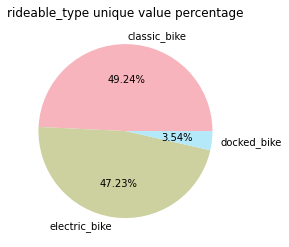

In [18]:
# taking a look at unique values in rideable_type
print(colored('Dataframe: df', attrs = ['bold']))
print(colored('Column   : rideable_type', attrs = ['bold']), '\n')
unique_value_report(df, 'rideable_type')
print('\n')

# visualizing the percentage
# note: variable 'table' below was created from the above defined function
plt.title('rideable_type unique value percentage')
plt.pie(table['Count'],
        colors = ['#F8B4BD', '#CDD09F', '#B4E9F9'],
        labels = table['rideable_type'],
        autopct = '%.2f%%')
plt.show()

#### **b. start_station_id and start_station_name**<a class = "anchor" id = "IIb_b"></a>

##### Getting all unique pairs of station Ids and names

For start_station_id and start_station_name, we are going to check the possibility of them having a sort of inconsistency problem, that is one station Id having more than one station names tied to it. First, we will create a tuple consisting of start_station_id and start_station_name. The reason we do not directly use unique function instead is that we need to perform this to two columns altogether, and this function can only do one column at a time.

In [19]:
# creating a list of tuples containing start_station_id and their corresponding start_station_name
start_station_zip = tuple(zip(df['start_station_id'], df['start_station_name']))

# creating an empty list to store the unique items
start_station_zip_unique = []

# iterating through the list of tuples to find the unique items
for i in start_station_zip:
    if i not in start_station_zip_unique:
        start_station_zip_unique.append(i)

# dropping the first item which contains nan
start_station_zip_unique = start_station_zip_unique[1:]

##### **Finding the Ids with more than one start_station_name**

After getting the supposedly "unique" items in the list of tuples above, we will check if the items are indeed unique by first extracting only the Ids, then counting each of them if the count equals 1 or not. Item whose count number is more than 1 means that there are more than one start_station_name that correspond to this start_station_id, and this is a problem, since it indicates that this Id has a form of inconsistency as a primary key.

In [20]:
# extracting only the Ids from the list of tuples

# creating an empty list to store the extracted Ids
start_station_extracted_id = []

# iterating through the list of tuples to extract the Ids
for tuple_item in start_station_zip_unique:
    start_station_extracted_id.append(tuple_item[0])

In [21]:
# finding the Ids which are likely to have more than one start_station_name

# creating an empty list to store the Ids whose count numbers are more than 1
start_station_id_inconsistent = []

# iterating through the list containing the extracted Ids to find the Ids with count numbers more than 1
for Id in start_station_extracted_id:
    Id_count = start_station_extracted_id.count(Id)
    if Id_count > 1:
        start_station_id_inconsistent.append(Id)

In [22]:
# counting start_station_id with more than 1 start_station_name
print('Count of start_station_id with more than 1 start_station_name tied to it:', 
      len(start_station_id_inconsistent), 
      'Ids',
      '(',(len(start_station_id_inconsistent) / len(start_station_extracted_id) * 100),'% )')

Count of start_station_id with more than 1 start_station_name tied to it: 348 Ids ( 23.868312757201647 % )


##### **Taking a closer look at sample of the problem**

Now that we have the problematic start_station_id items, let's take a quick check at them by calling some samples and their correponding start_station_name.

In [23]:
# getting a sample of the suspected inconsistent start_station_id
sta_id_sample = start_station_id_inconsistent[0]
print('Sample of start_station_id with more than 1 start_station_name:', sta_id_sample)

Sample of start_station_id with more than 1 start_station_name: 604


In [24]:
# checking if start_station_id 604 has more than one start_station_name tied to it
print('start_station_name with Id is 604:')
list((df['start_station_name'][df['start_station_id'] == '604']).unique())

start_station_name with Id is 604:


['Sheridan Rd & Noyes St (NU)', 'Wentworth Ave & 103rd St']

In [25]:
# checking the proportion of both station names in the start_station_id 604
print('Count of start station with Id 604 and name Sheridan Rd & Noyes St (NU):',
      (((df['start_station_name'] == 'Sheridan Rd & Noyes St (NU)') & (df['start_station_id'] == '604')) == True).sum(),
      'stations')
print('Count of start station with Id 604 and name Wentworth Ave & 103rd St   :',
      (((df['start_station_name'] == 'Wentworth Ave & 103rd St') & (df['start_station_id'] == '604')) == True).sum(),
      'stations')

Count of start station with Id 604 and name Sheridan Rd & Noyes St (NU): 6144 stations
Count of start station with Id 604 and name Wentworth Ave & 103rd St   : 6 stations


From the result above, it can be seen that start_station_id 604, a sample from the start_station_id items that may have inconsistency, indeed have more than one start_station_name tied to it, which are 'Sheridan Rd & Noyes St (NU)' and 'Wentworth Ave & 103rd St'. Now that we know there are some start_station_id which have this problem, we'll take a look at how many of them are present.

#### **c. end_station_id and end_station_name**<a class = "anchor" id = "IIb_c"></a>

After checking the columns start_station_name and start_station_id, it is highly possible that columns end_station_id and end_station_name would have the same inconsistency problem. In this section, we are basically going to perform the exact same step to spot the problem for the end stations.

##### Getting all unique pairs of station Ids and names

In [26]:
# creating a list of tuples containing end_station_id and their corresponding end_station_name
end_station_zip = tuple(zip(df['end_station_id'], df['end_station_name']))

# creating an empty list to store the unique items
end_station_zip_unique = []

# iterating through the list of tuples to find the unique items
for i in end_station_zip:
    if i not in end_station_zip_unique:
        end_station_zip_unique.append(i)

# dropping the first item which contains nan
end_station_zip_unique = end_station_zip_unique[1:]

##### **Finding the Ids with more than one end_station_name**

In [27]:
# extracting only the Ids from the list of tuples

# creating an empty list to store the extracted Ids
end_station_extracted_id = []

# iterating through the list of tuples to extract the Ids
for tuple_item in end_station_zip_unique:
    end_station_extracted_id.append(tuple_item[0])

In [28]:
# finding the Ids which are likely to have more than one end_station_name

# creating an empty list to store the Ids whose count numbers are more than 1
end_station_id_inconsistent = []

# iterating through the list containing the extracted Ids to find the Ids with count numbers more than 1
for Id in end_station_extracted_id:
    Id_count = end_station_extracted_id.count(Id)
    if Id_count > 1:
        end_station_id_inconsistent.append(Id)

In [29]:
# counting end_station_id with more than 1 end_station_name
print('Count of end_station_id with more than 1 end_station_name tied to it:', 
      len(end_station_id_inconsistent), 
      'Ids',
      '(',(len(end_station_id_inconsistent) / len(end_station_extracted_id) * 100),'% )')

Count of end_station_id with more than 1 end_station_name tied to it: 353 Ids ( 24.01360544217687 % )


##### **Taking a closer look at sample of the problem**

In [30]:
# getting a sample of the suspected inconsistent end_station_id
end_station_id_inconsistent[0]

'604'

In [31]:
# checking if end_station_id 604 has more than one end_station_name tied to it
print('end_station_name with Id is 604:')
list((df['end_station_name'][df['end_station_id'] == '604']).unique())

end_station_name with Id is 604:


['Sheridan Rd & Noyes St (NU)', 'Wentworth Ave & 103rd St']

In [32]:
# checking the proportion of both station names in the start_station_id 604
print('Count of end station with Id 604 and name Sheridan Rd & Noyes St (NU):',
      (((df['end_station_name'] == 'Sheridan Rd & Noyes St (NU)') & (df['end_station_id'] == '604')) == True).sum(),
      'stations')
print('Count of end station with Id 604 and name Wentworth Ave & 103rd St   :',
      (((df['end_station_name'] == 'Wentworth Ave & 103rd St') & (df['end_station_id'] == '604')) == True).sum(),
      'stations')

Count of end station with Id 604 and name Sheridan Rd & Noyes St (NU): 6186 stations
Count of end station with Id 604 and name Wentworth Ave & 103rd St   : 8 stations


As we suspected, the same problem occurs in end stations as well. There are some end_station_id with that have more than 1 end_station_name. Later, after performing some engineering processes to these both start and end station Ids and names, we will if the pair of start_station_id and start_station_name is the same as the pair of end_station_id and end_station_name.

#### **d. member_casual**<a class = "anchor" id = "IIb_d"></a>

Dataframe: df
Column   : member_casual 



,member_casual,Count,Percentage (%)
1,member,3414564,58.040779
0,casual,2468479,41.959221


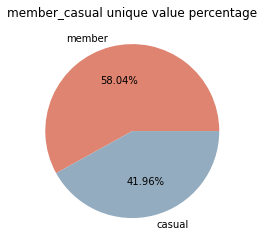

In [33]:
# taking a look at unique values in member_casual
print(colored('Dataframe: df', attrs = ['bold']))
print(colored('Column   : member_casual', attrs = ['bold']), '\n')
unique_value_report(df, 'member_casual')
print('\n')

# visualizing the percentage
# note: variable 'table' below was created from the above defined function
plt.title('member_casual unique value percentage')
plt.pie(table['Count'],
        colors = [color_m, color_c],
        labels = table['member_casual'],
        autopct = '%.2f%%')
plt.show()

Findings:
* There are missing values in columns start_station_id, start_station_name, end_station_id, end_station_name, end_lat, and end_lng.
* The fact that the count of unique start_station_id is 1273, while the count of unique start_station_name is 1439 indicates a problem. These counts should be the same, as each station id should serve as a primary key to the corresponding station name. This case is also the same for the end stations.
* There are some start_station_name that share a same start_station_id, indicating a form of inconsistency in the start_station_id as a primary key to the start_station_name.

## **III. Data Cleaning and Engineering**<a class = "anchor" id = "III"></a>

### **IIIa. Column: started_at**<a class = "anchor" id = "IIIa"></a>

##### **Checking started_at column data type**

The column started_at indicates at what time a customer started the bike ride. The appropriate type of data this column should have is datetime. Let's check the type of data this column currently has.

In [34]:
# checking the data type of started_at
df['started_at'].dtype

dtype('O')

The data type this column has is still string. We will now convert it to datetime.

##### **Converting started_at from string to datetime**

In [35]:
# converting started_at to datetime data
df['started_at'] = pd.to_datetime(df['started_at'])

In [36]:
# checking the now converted started_to
print('started_at column data type:', str(df['started_at'].dtype))

started_at column data type: datetime64[ns]


### **IIIb. Column: ended_at**<a class = "anchor" id = "IIIb"></a>

##### **Checking ended_at column data type**

Same as with started_at column, we will first check what type of data ended_at column has. If it is still in string, we will convert it into datetime.

In [37]:
# checking the data type of ended_at
df['ended_at'].dtype

dtype('O')

##### **Converting ended_at from string to datetime**

In [38]:
# converting ended_at to datetime data
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [39]:
# checking the now converted ended_at
print('ended_at column data type:', str(df['ended_at'].dtype))

ended_at column data type: datetime64[ns]


Now that we have converted the items in both started_at and ended_at columns into datetime, we will create a new column in this dataframe containing their subtraction. This new value indicates for how long a customer did a bike ride.

### **IIIc. Column: trip_duration**<a class = "anchor" id = "IIIc"></a>

##### **Counting entries that have started_at larger than ended_at to decide what cleaning action to take**

In this section, we are going to calculate the ride duration for each trip. Before we do that, we have to make sure that the data makes sense. It is only logical that a trip's started_at value should not be larger than its ended_at value. Otherwise, not only it does not make sense, the calculation will encounter a problem as well. Let's check if there are entries with started_at value larger than its ended_at value, and if there are indeed entries like that, we'll check how many of them are present in the dataframe.

In [40]:
# counting how many entries with started_at value larger than its ended_at value
print('Count of entries with started_at value larger than its ended_at value:', len(df[df['ended_at'] < df['started_at']]))

Count of entries with started_at value larger than its ended_at value: 135


Turns out there are these problematic entries, and thankfully, there are not many of them relatively, compared to the number of total entries this dataframe has. With this consideration

##### **Dropping the entries with started_at values > ended_at values**

In [41]:
# returning the entry indexes to drop
drop_index = (df[df['ended_at'] < df['started_at']]).index

# dropping the problematic rows
df.drop(drop_index , inplace=True)

In [42]:
# rechecking if the problematic entries are still present
print('Count of entries with started_at value larger than its ended_at value:', len(df[df['ended_at'] < df['started_at']]))

Count of entries with started_at value larger than its ended_at value: 0


After dropping the rows, we can now try to calculate the difference between ended_at and started_at to get the trip duration.

##### **Creating a new column trip_duration**

In [43]:
# calculating the trip durations
df['trip_duration'] = df['ended_at'] - df['started_at']

# converting the values in trip_duration to seconds
df['trip_duration'] = [item.total_seconds() for item in df['trip_duration']]

Let's rearrange the column position by relocating trip_duration right next to the ended_at column to make them easier to look at.

##### **Dataframe columns rearrangement**

In [44]:
# taking a look again at the dataframe columns to get their arrangement
print('Dataframe columns before rearrangement:')
list(df.columns)

Dataframe columns before rearrangement:


['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'member_casual',
 'trip_duration']

In [45]:
# trip_duration -> [-1]
# ended_at -> [3]
# start_station_name -> [4]

# creating a variable containing the rearranged column names
col_rearrange = df.columns[:4].to_list() + [df.columns[-1]] +  df.columns[4:-1].to_list()
print('Dataframe columns after rearrangement:')
col_rearrange

Dataframe columns after rearrangement:


['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'trip_duration',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'member_casual']

In [46]:
# rearranging the column order in the dataframe
df = df[col_rearrange]

While we're still at this column, we need to check if there are any illogical trip duration by spotting and dropping entries where outliers are present. For example, it is not sound very plausible that a customer took a trip from one station to another in less than just 1 second. We'll first take a look at the min and max values of this column. 

##### **Calculating min and max values of trip_duration**

In [47]:
# calculating min value of trip_duration
trip_duration_min = df['trip_duration'].min()
print('Minimum value in trip_duration:', trip_duration_min, 'seconds')

# calculating max value of trip_duration
trip_duration_max = df['trip_duration'].max()
print('Maximum value in trip_duration:', 
      trip_duration_max, 
      'seconds or',
      trip_duration_max / 3600,
     'hour(s)')

Minimum value in trip_duration: 0.0 seconds
Maximum value in trip_duration: 2442301.0 seconds or 678.4169444444444 hour(s)


From the result above, it is clear that both the lower and upper bounds of this column do not sound very logical. As a starter to address this problem, we are going to perform an analysis to spot outliers. Before beginning the IQR calculation, the values that are the least likely to occur in reality will be dropped, which are trip_duration less than 60 seconds. 

**Important Note**:<br>
* If opportunity presents itself, it is often better to consult with the stakeholder that understands the business operation well and ask how close a pair of station can be and if it is possible to reach it in under a minute.
* If this kind of data is indeed not normal, it is important to take note for future mention of this problem. There might be a problem in data acquirement, especially for the started_at and ended_at variables, and this needs to be addressed.

##### **Dropping entries with trip_duration less than 60 seconds (lower outliers)**

In [48]:
# counting how many trip duration less than 60 seconds there are
len(df['trip_duration'][df['trip_duration'] < 60])

110577

There are 110577 entries with trip_duration less than 60 seconds. We'll drop these.

In [49]:
# dropping entries with trip_duration less than 60 seconds
df = df[df['trip_duration'] > 60]

Now, let's use a more statistical approach in dropping the outliers.

##### **Determining lower and upper bounds for outliers in trip_duration**

In [50]:
# getting outlier bounds of trip_duration
outlier_bounds(df, 'trip_duration')

,Quantile,trip_duration
Q1,0.25,377.0
Q3,0.75,1176.0


IQR of trip_duration : 799.0
1.5 IQR: 1198.5 

Outlier lower bound of trip_duration : -821.5
Count of trip_duration lower outliers: 0 

Outlier upper bound of trip_duration : 2374.5
Count of trip_duration upper outliers: 419820


##### **Dealing with upper outliers**

The lower bound of trip_duration is less than zero, so we can take our previous step in eliminating entries with trip_duration less than 60 seconds as sufficient. Let's proceed with the upper outliers.

In [51]:
# counting entries with trip_duration more than 2356 seconds
trip_duration_u_outlier = len(df['trip_duration'][df['trip_duration'] > 2356])
print('Count of trip_duration more than 2356 seconds:', trip_duration_u_outlier)

Count of trip_duration more than 2356 seconds: 426355


Around 10% of the total entries fulfill this condition and this is a bit too many to drop all at once. We'll try a more lenient approach by assuming that it is still likely for a customer to do a single bike trip in 2 hours, or 7200 seconds.

**Important Note:**<br>
Again, it is better to consult how the business works with a stakeholder that understands the business well. For example, asking about the policy of the bike ride, like if it is okay to make a checkpoint outside of the stations in a single trip.

In [52]:
# counting entries with trip_duration more than 7200 seconds
trip_duration_u_outlier = len(df['trip_duration'][df['trip_duration'] > 7200])
print('Count of trip_duration more than 2356 seconds:', trip_duration_u_outlier)

Count of trip_duration more than 2356 seconds: 50404


There are 50404 entries with trip_duration more than 7200 seconds (2 hours), a relatively more reasonable number of entries to drop.

In [53]:
# dropping entries with trip_duration more than 7200 seconds (2 hours)
df = df[df['trip_duration'] < 7200]

### **IIId. Columns: start_station_id and start_station_name**<a class = "anchor" id = "IIId"></a>

##### **Creating a lookup table to be used to clean start_station_name**

For the start station columns, we will first clean the start_station_name values. As we have checked, we know that there are start_station_id that have more than 1 start_station_name tied to it, where they are not supposed to be like that. We want 1 station Id to be tied with 1 station name only. To solve this, for each station Id that has more than 1 station name tied to it, we will replace the station names that have fewer counts with the station name that has the highest count.

In [54]:
# creating the lookup table containing start_station_id and start_station_name
start_station_lookup = df[['start_station_id', 'start_station_name']]

# grouping the Ids by what station name appears most for each Id
start_station_lookup = start_station_lookup.groupby('start_station_id').agg(pd.Series.mode)

##### **Checking a sample of the lookup table**

Previously, we have checked that for start_station_id '604', there would appear **two** start_station_name, which are 'Sheridan Rd & Noyes St (NU)' and 'Wentworth Ave & 103rd St', with a count ratio of 6144 : 6. If the lookup table works, the start_station_id '604' should be tied to start_station_name 'Sheridan Rd & Noyes St (NU)'.

In [55]:
# checking what start_station_name would appear for start_station_id '604'
start_station_lookup[start_station_lookup.index == '604']

,start_station_name
start_station_id,
604,Sheridan Rd & Noyes St (NU)


Good, now that the lookup table has been confirmed to work by showing only **one** start_station_name for start_station_id '604', let's clean the start_station_name.

##### **Replacing the start_station_name using the lookup table**

In [56]:
# replacing the start_station_name with the value in the lookup table
df['start_station_name'] = df['start_station_id'].map(start_station_lookup['start_station_name'])

Although we have replaced the values, there still might be a problem when an entry has more than one station name or in other words, it has an array type of data in its start_station_name. This problem can occur when there are 2 or more stations that has exactly same count number for a station Id when we created the lookup table earlier. We will be checking it now.

##### **Checking entries that has an array value in their start_station_name**

In [57]:
# checking entries that has an array value in their start_station_name
array_start_station_name = df[df['start_station_name'].apply(lambda x: isinstance(x, np.ndarray))]

# taking a quick look at the array items
display(array_start_station_name['start_station_name'])

# counting how many of them are present in the start_station_name column
print('Count of entries that have array type of data in their start_station_name column:',
      len(array_start_station_name))

Series([], Name: start_station_name, dtype: object)

Count of entries that have array type of data in their start_station_name column: 0


We have confirmed the presence of items in start_station_name that are arrays. Fortunately, there are only 20 of them, a relatively very small number compared to the whole number of items. We will use the first item in the array for this case.

##### **Addressing the array items in start_station_name**

In [58]:
# getting the indexes of rows with array item in their start_station_name
row_index = (array_start_station_name.index).to_list()

# replacing the array items in start_station_name
for index in row_index:
    df['start_station_name'][index] = df['start_station_name'][index][0]

In [59]:
# rechecking entries that has an array value in their start_station_name
array_start_station_name = df[df['start_station_name'].apply(lambda x: isinstance(x, np.ndarray))]

# recounting how many of them are present in the start_station_name column
print('Count of entries that have array type of data in their start_station_name column:',
      len(array_start_station_name))

Count of entries that have array type of data in their start_station_name column: 0


In [60]:
# checking df's missing values
missing_values_perc(df)

Missing values on each column :  

            Column  Count  Percentage (%)
           ride_id      0            0.00
     rideable_type      0            0.00
        started_at      0            0.00
          ended_at      0            0.00
     trip_duration      0            0.00
start_station_name 853356           14.92
  start_station_id 853356           14.92
  end_station_name 899184           15.72
    end_station_id 899184           15.72
         start_lat      0            0.00
         start_lng      0            0.00
           end_lat    496            0.01
           end_lng    496            0.01
     member_casual      0            0.00


Nice! Now that we're done with the start_station_id and start_station_name inconsistency, we are going to address their missing value problem.

##### Addressing the missing values in start_station_id and start_station_name

Originally, the plan to address the missing values in both of these columns is to fill them based on each entry's corresponding lat and lng. However, after referencing a station's lat and lng as a sample to the lookup table I created containing each unique station's lat and lng possible range using some filtering and sorting method, I found that more than one station can fulfill a set of lat and lng range. In other words, this missing station Id and name filling method is not reliable, since there is no way we can tell which certain station is the one for the entry, given its lat and lng data alone. Moreover, neither my local computing machine nor my cloud-based free-plan Google Colab and can handle the volume of the input for the code. One of the more plausible ways to fill in these missing values is to get in contact with the dataset provider and ask if they have any other dataframes containing each ride_id's data about its start_station_id and start_station_name. For now, we will omit the rows with the missing start_station_id and start_station_name values.

In [61]:
# dropping the entries with empty start_station_id value
df = df[df['start_station_id'].notna()]

In [62]:
# checking df's missing values
missing_values_perc(df)

Missing values on each column :  

            Column  Count  Percentage (%)
           ride_id      0            0.00
     rideable_type      0            0.00
        started_at      0            0.00
          ended_at      0            0.00
     trip_duration      0            0.00
start_station_name      0            0.00
  start_station_id      0            0.00
  end_station_name 419403            8.62
    end_station_id 419403            8.62
         start_lat      0            0.00
         start_lng      0            0.00
           end_lat    496            0.01
           end_lng    496            0.01
     member_casual      0            0.00


After dropping the entries with missing start_station_id values, there are no more entries with missing start_station_name either. Let's continue on with the next columns.

### **IIIe. Columns: end_station_id and end_station_name**<a class = "anchor" id = "IIIe"></a>

The data cleaning process for both end_station_id and end_station_name will follow the same steps as when we cleaned start_station_id and start_station_name. As a reminder note, this is the problem we need to tackle for these columns, where one station Id can contain more than one station name.

In [63]:
# checking if end_station_id 604 has more than one end_station_name tied to it
print('end_station_name with Id is 604:')
list((df['end_station_name'][df['end_station_id'] == '604']).unique())

end_station_name with Id is 604:


['Sheridan Rd & Noyes St (NU)', 'Wentworth Ave & 103rd St']

##### **Creating a lookup table to be used to clean end_station_name**

In [64]:
# creating the lookup table containing start_station_id and start_station_name
end_station_lookup = df[['end_station_id', 'end_station_name']]

# grouping the Ids by what station name appears most for each Id
end_station_lookup = end_station_lookup.groupby('end_station_id').agg(pd.Series.mode)

##### **Checking a sample of the lookup table**

In [65]:
# checking what start_station_name would appear for end_station_id '604'
end_station_lookup[end_station_lookup.index == '604']

,end_station_name
end_station_id,
604,Sheridan Rd & Noyes St (NU)


##### **Replacing the end_station_name using the lookup table**

In [66]:
# replacing the end_station_name with the value in the lookup table
df['end_station_name'] = df['end_station_id'].map(end_station_lookup['end_station_name'])

##### **Checking entries that has an array value in their end_station_name**

In [67]:
# checking entries that has an array value in their end_station_name
array_end_station_name = df[df['end_station_name'].apply(lambda x: isinstance(x, np.ndarray))]

# taking a quick look at the array items
display(array_end_station_name['end_station_name'])

# counting how many of them are present in the end_station_name column
print('Count of entries that have array type of data in their end_station_name column:',
      len(array_end_station_name))

2945033    [Public Rack - Sawyer Ave & Bryn Mawr Ave - SE...
2945268    [Public Rack - Sawyer Ave & Bryn Mawr Ave - SE...
3866463    [Public Rack - Sawyer Ave & Bryn Mawr Ave - SE...
3868525    [Public Rack - Sawyer Ave & Bryn Mawr Ave - SE...
5371393    [Public Rack - Sawyer Ave & Bryn Mawr Ave - SE...
5372843    [Public Rack - Sawyer Ave & Bryn Mawr Ave - SE...
Name: end_station_name, dtype: object

Count of entries that have array type of data in their end_station_name column: 6


##### **Addressing the array items in end_station_name**

In [68]:
# getting the indexes of rows with array item in their end_station_name
row_index = (array_end_station_name.index).to_list()

# replacing the array items in end_station_name
for index in row_index:
    df.loc[index, 'end_station_name'] = df['end_station_name'][index][0]

In [69]:
# rechecking entries that has an array value in their end_station_name
array_end_station_name = df[df['end_station_name'].apply(lambda x: isinstance(x, np.ndarray))]

# recounting how many of them are present in the end_station_name column
print('Count of entries that have array type of data in their end_station_name column:',
      len(array_end_station_name))

Count of entries that have array type of data in their end_station_name column: 0


In [70]:
# checking df's missing values
missing_values_perc(df)

Missing values on each column :  

            Column  Count  Percentage (%)
           ride_id      0            0.00
     rideable_type      0            0.00
        started_at      0            0.00
          ended_at      0            0.00
     trip_duration      0            0.00
start_station_name      0            0.00
  start_station_id      0            0.00
  end_station_name 419403            8.62
    end_station_id 419403            8.62
         start_lat      0            0.00
         start_lng      0            0.00
           end_lat    496            0.01
           end_lng    496            0.01
     member_casual      0            0.00


##### **Addressing the missing values in end_station_id and end_station_name**

In [71]:
# dropping the entries with empty end_station_id value
df = df[df['end_station_id'].notna()]

In [72]:
# checking df's missing values
missing_values_perc(df)

Missing values on each column :  

            Column  Count  Percentage (%)
           ride_id      0             0.0
     rideable_type      0             0.0
        started_at      0             0.0
          ended_at      0             0.0
     trip_duration      0             0.0
start_station_name      0             0.0
  start_station_id      0             0.0
  end_station_name      0             0.0
    end_station_id      0             0.0
         start_lat      0             0.0
         start_lng      0             0.0
           end_lat      0             0.0
           end_lng      0             0.0
     member_casual      0             0.0


After dropping the entries with missing end_station_id, there are no more missing values in end_station_name, end_lat, and end_lng as well, meaning that there are no missing values anymore and we can continue on to next analysis phase. To make the data cleaner before the analysis phase, we'll reset the dataframe's row index.

In [73]:
# creating new row index
df = df.reset_index()

# dropping the previous row index
df = df.drop('index', axis = 1)

### **IIIf. Data Cleaning and Engineering Log**<a class = "anchor" id = "IIIf"></a>

For now, we have done addressing the issues in the dataframe that had been found previously in Phase II Data Exploration. Below is the documentation of the data cleaning and engineering process that have been performed on the dataframe.
1. Converted the data type of items in [started_at] column from string to datetime. (Phase IIIa)
2. Converted the data type of items in [ended_at] column from string to datetime. (Phase IIIb)
3. Dropped entries where [started_at] > [ended_at], since it is not possible in reality for this to occur. (Phase IIIc)
4. Created a new column, [trip_duration], which values are [ended_at] - [started_at]. (Phase IIIc)
5. Rearranged the order of the columns: [trip_duration] was moved from the end to be right next to [ended_at]. (Phase IIIc)
6. Dropped entries (total = 110577) with lower outlier [trip_duration] ([trip_duration] < 60 seconds), since it is less likely to have happended. (Phase IIIc)
7. Dropped entries (total = 50404) with upper outlier [trip_duration] ([trip_duration] > 2 hours). Initially, it was planned to drop entries with [trip_duration] > (Q3 + 1.5IQR). However, as there were many entries (more than 10%) that fulfilled the condition, I decided to use 7200 seconds or 2 hours as the upper outlier bound, with assumption that it was still likely that customers would make 2 hours trips. (Phase IIIc)
8. Addressed [start_station_id] (total = 348 Ids) that have more than one [start_station_name] tied to them by creating a lookup table that consisted of each unique value of [start_station_id] and its highest count [start_station_name], then replacing the [start_station_name] using the vlookup method. (Phase IIId)
9. Dropped entries (total = 853356) with missing [start_station_id] and [start_station_name]. Initially, I planned to address this issue by creating a lookup table consisting of each [start_station_id] and its possible range of latitude and longitude, then filling in the missing [start_station_id] and [start_station_name] values using random float that are still in the range of the values in the lookup table. After that, I would then drop the remaining missing values, which are [start_station_id] and [start_station_name] that completely had no latitude and longitude reference. However, as there were more than 1 [start_station_id] and [start_station_name] whose latitude and longitude ranges overlapped each other, I decided to drop all of the entries with missing values for now. (Phase IIId)
10. Addressed [end_station_id] (total = 353 Ids) that have more than one [end_station_name] tied to them by creating a lookup table that consisted of each unique value of [end_station_id] and its highest count [end_station_name], then replacing the [start_station_name] using the vlookup method. (Phase IIIe)
11. Addressed entries (total = 6) that have more than 1 [end_station_name] by using only the first item in the list. This problem may have risen due to the previous lookup replacement step, where a [end_station_id] has 1 or more [end_station_name] with exact same counts. (Phase IIIe)
12. Dropped entries (total = 419403) with missing [end_station_id] and [end_station_name] with the same reason as when I dropped entries with missing [start_station_id] and [start_station_name]. While dropping these entries, it was also coincidental that entries (total = 496) with missing [end_lat] and [end_lng] were also dropped. (Phase IIIe)

## **IV. Data Analysis**<a class = "anchor" id = "IV"></a>

### **IVa. Type of Bike Preference**<a class = "anchor" id = "IVa"></a>

#### **a. Each Type of Bike Popularity**<a class = "anchor" id = "IVa_a"></a>

In [74]:
# recounting each type of bike after the data cleaning
unique_value_report(df, 'rideable_type')

,rideable_type,Count,Percentage (%)
0,classic_bike,2829377,63.609522
1,electric_bike,1429834,32.145259
2,docked_bike,188829,4.245218


In [75]:
# pivoting data
bike_dist = df.groupby(['member_casual', 'rideable_type']).size() \
            .unstack(level=-1, fill_value=0).stack() \
            .to_frame() \
            .reset_index() \
            .rename(columns = {0: 'count'}) \
            .sort_values(['member_casual', 'count'], ascending = [True, False], ignore_index = True)

# defining x and y axis values for plotting
bike_label = ['Classic Bike', 'Electric Bike', 'Docked Bike']
member_bike = bike_dist['count'][bike_dist['member_casual'] == 'member']
casual_bike = bike_dist['count'][bike_dist['member_casual'] == 'casual']

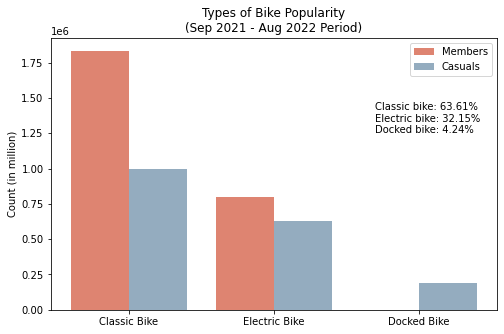

In [76]:
# Creating the bar plot
plt.figure(figsize = (8, 5))
x = np.arange(len(bike_label))

# for members
plt.bar(x - 0.2, 
        member_bike, 
        width = 0.4, 
        label = 'Members', 
        color = color_m)

# for casuals
plt.bar(x + 0.2, 
        casual_bike, 
        width = 0.4, 
        label = 'Casuals', 
        color = color_c)

# additional text
plt.text(1.7, 1250000,
         'Classic bike: 63.61%\nElectric bike: 32.15%\nDocked bike: 4.24%')

# setting plot information
plt.title('Types of Bike Popularity\n(Sep 2021 - Aug 2022 Period)')
plt.xticks(x, bike_label)
plt.ylabel('Count (in million)')
plt.legend()
plt.savefig('Types of Bike Popularity.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()

Historically speaking for the past 12 months, among the 3 types of bike, classic bikes are the most popular ones, both among members and casuals, with docked bikes being the least popular. Next, let's compare the popularity growth between classic bikes and electric bikes.

#### **b. Classic and Electric Bikes Popularity Growth**<a class = "anchor" id = "IVa_b"></a>

In [77]:
# creating filters for member_casual and rideable_type
member_filter = df['member_casual'] == 'member'
casual_filter = df['member_casual'] == 'casual'
classic_filter = df['rideable_type'] == 'classic_bike'
electric_filter = df['rideable_type'] == 'electric_bike'

# filtering each sets of rideable_type and member_casual
member_classic = df[member_filter & classic_filter] \
                 .groupby(df['started_at'].dt.strftime('%Y-%m'), 
                          sort = False) \
                 .size()
member_electric = df[member_filter & electric_filter] \
                  .groupby(df['started_at'].dt.strftime('%Y-%m'), 
                           sort = False) \
                  .size()
casual_classic = df[casual_filter & classic_filter] \
                 .groupby(df['started_at'].dt.strftime('%Y-%m'), 
                          sort = False) \
                 .size()
casual_electric = df[casual_filter & electric_filter] \
                  .groupby(df['started_at'].dt.strftime('%Y-%m'), 
                           sort = False) \
                  .size()

# converting the series into dataframe format for easier plotting
member_classic = member_classic.to_frame().reset_index().rename(columns = {0: 'Count'})
member_electric = member_electric.to_frame().reset_index().rename(columns = {0: 'Count'})
casual_classic = casual_classic.to_frame().reset_index().rename(columns = {0: 'Count'})
casual_electric = casual_electric.to_frame().reset_index().rename(columns = {0: 'Count'})

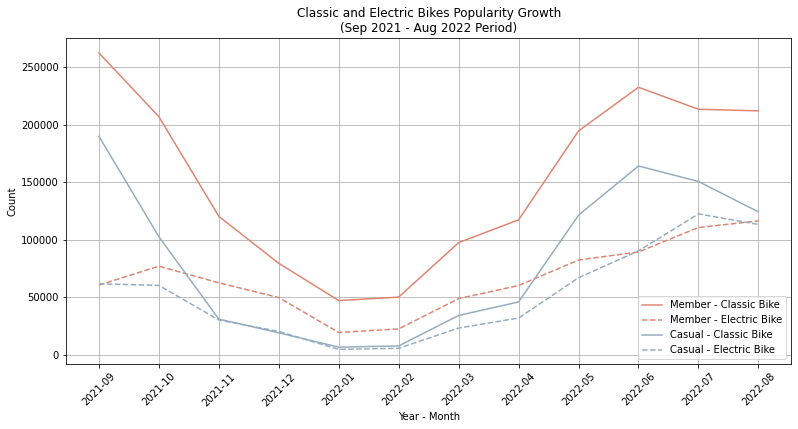

In [78]:
# plotting each sets
plt.figure(figsize = (13, 6))
plt.plot(member_classic['started_at'].astype('str'), 
         member_classic['Count'],
         label = 'Member - Classic Bike',
         color = color_m)
plt.plot(member_electric['started_at'],
         member_electric['Count'],
         label = 'Member - Electric Bike',
         linestyle = '--',
         color = color_m)
plt.plot(casual_classic['started_at'],
         casual_classic['Count'],
         label = 'Casual - Classic Bike',
         color = color_c)
plt.plot(casual_electric['started_at'],
         casual_electric['Count'],
         label = 'Casual - Electric Bike',
         linestyle = '--',
         color = color_c)

# setting plot information
plt.title('Classic and Electric Bikes Popularity Growth\n(Sep 2021 - Aug 2022 Period)')
plt.xticks(rotation = 45)
plt.xlabel('Year - Month')
plt.ylabel('Count')
plt.grid()
plt.legend()
plt.savefig('Classic vs Electric Bike Popularity Growth.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()

Turns out that both classic and electric bikes show similar trend in popularity growth, with classic bikes, which is the most popular type of bike shows a visually higher popularity growth approaching mid year months.

### **IVb. Monthly Seasonality**<a class = "anchor" id = "IVb"></a>

#### **a. Trip Counts per Month**<a class = "anchor" id = "IVb_a"></a>

In [79]:
# creating members and casuals filters
member_filter = df['member_casual'] == 'member'
casual_filter = df['member_casual'] == 'casual'

# creating a list of month names for x axis tick labels
months = calendar.month_name[1:]

# counting how many trips happened during each month
member_monthly = []
casual_monthly = []
for month in range(1, 13):
    member_count = len(df[member_filter & (df['started_at'].dt.month.isin([month]))])
    member_monthly.append(member_count)
    casual_count = len(df[casual_filter & (df['started_at'].dt.month.isin([month]))])
    casual_monthly.append(casual_count)

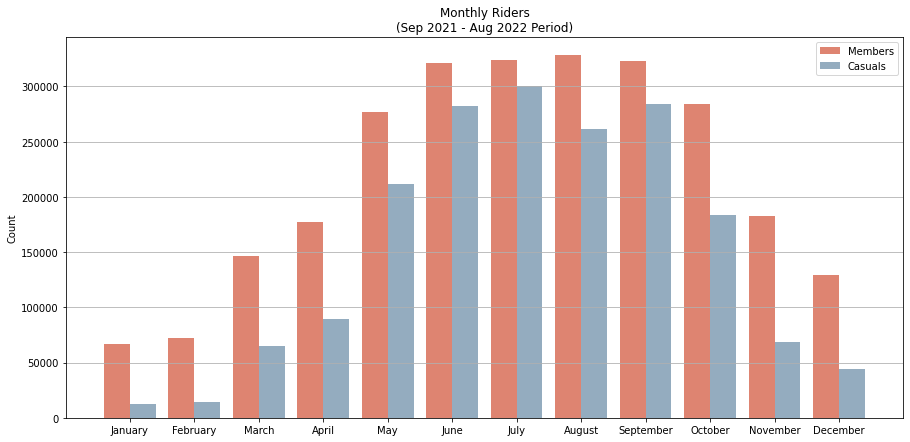

In [80]:
# Creating the bar plot
plt.figure(figsize = (15, 7))
x = np.arange(len(months))

# for members
plt.bar(x - 0.2, 
        member_monthly, 
        width = 0.4, 
        label = 'Members', 
        color = color_m)

# for casuals
plt.bar(x + 0.2, 
        casual_monthly, 
        width = 0.4, 
        label = 'Casuals', 
        color = color_c)

# setting plot information
plt.title('Monthly Riders\n(Sep 2021 - Aug 2022 Period)')
plt.xticks(x, months)
plt.ylabel('Count')
plt.legend()
plt.grid(axis = 'y')
plt.savefig('Monthly Riders.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()

#### **b. Trip Volume Percentage on Busy Months**<a class = "anchor" id = "IVb_b"></a>

##### **Table Report**

In [81]:
# creating busy and non-busy month filters
busy_month_filter = df['started_at'].dt.month.isin([5, 6, 7, 8, 9, 10])
nonbusy_month_filter = df['started_at'].dt.month.isin([1, 2, 3, 4, 11, 12])

In [82]:
# counting how many trips happened during busy and non-busy months for members and casuals
member_busy_month = len(df[member_filter & busy_month_filter])
casual_busy_month = len(df[casual_filter & busy_month_filter])
member_nonbusy_month = len(df[member_filter & nonbusy_month_filter])
casual_nonbusy_month = len(df[casual_filter & nonbusy_month_filter])

In [83]:
# creating table variables for categories and counts
categories = ['Busy month (members)', 'Busy months (casuals)', 'Non-busy months (members)', 'Non-busy months (casuals)']
counts = [member_busy_month, casual_busy_month, member_nonbusy_month, casual_nonbusy_month]

# calculating count percentage for each category
percentage = [(count / sum(counts) * 100) for count in counts]
percentage = ['{:.2f}%'.format(item) for item in percentage]

# summarizing result in a table
table = pd.DataFrame(list(zip(categories, counts, percentage)))
table.columns = ['Categories', 'Count', 'Percentage']

# displaying the result
table

,Categories,Count,Percentage
0,Busy month (members),1856961,41.75%
1,Busy months (casuals),1523085,34.24%
2,Non-busy months (members),774653,17.42%
3,Non-busy months (casuals),293341,6.59%


##### **Bar Graph Report**

In [84]:
# creating busy and non-busy months labels
busy_month_label = ['Busy Months', 'Non-busy months']

# creating busy and non-busy months variables for members and casuals
busy_month_m = [member_busy_month, member_nonbusy_month]
busy_month_c = [casual_busy_month, casual_nonbusy_month]

# creating x-axis labels
labels = ['Busy Months', 'Non-busy months']

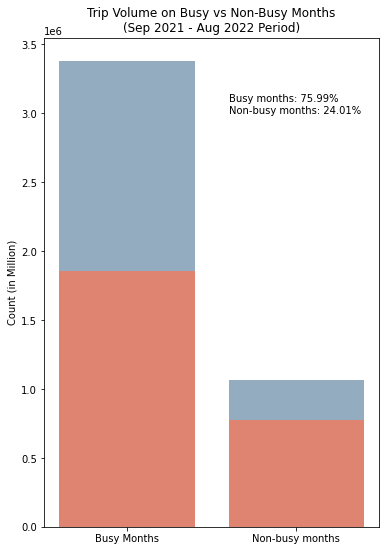

In [85]:
# for members
plt.figure(figsize = (6, 9))
plt.bar(busy_month_label,
        busy_month_m,
        color = color_m,
        label = 'Casuals')

# for casuals
plt.bar(busy_month_label,
        busy_month_c,
        bottom = busy_month_m,
        color = color_c,
        label = 'Members')

# additional text
plt.text(0.6, 3000000,
         'Busy months: 75.99%\nNon-busy months: 24.01%')

# setting plot information
plt.title('Trip Volume on Busy vs Non-Busy Months\n(Sep 2021 - Aug 2022 Period)')
plt.ylabel('Count (in Million)')
plt.savefig('Trip Volume on Busy vs Non-Busy Months.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()

### **IVc. Busy Hours**<a class = "anchor" id = "IVc"></a>

#### **a. Busy Hours in General**<a class = "anchor" id = "IVc_a"></a>

In [86]:
# rounding down the values in started_at to half an hour
member_started = df[df['member_casual'] == 'member']['started_at'] \
                 .dt.floor('30min') \
                 .dt.time \
                 .to_frame()
casual_started = df[df['member_casual'] == 'casual']['started_at'] \
                 .dt.floor('30min') \
                 .dt.time \
                 .to_frame()

In [87]:
# grouping the data by started_at
member_started = member_started.groupby('started_at').size() \
                 .reset_index(name = 'Count')
casual_started = casual_started.groupby('started_at').size() \
                 .reset_index(name = 'Count')

In [88]:
# formatting the values in started_in column
member_started['started_at'] = [item.strftime('%H:%M') for item in member_started['started_at']]
casual_started['started_at'] = [item.strftime('%H:%M') for item in casual_started['started_at']]

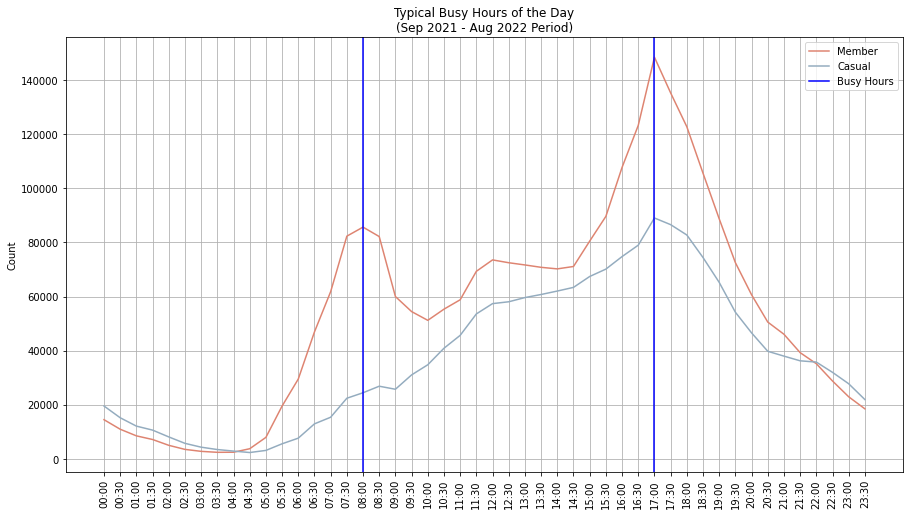

In [89]:
# creating line plots to show at what time members and casuals typically start their trip 
plt.figure(figsize = (15, 8))
plt.plot(member_started['started_at'].astype('str'), 
         member_started['Count'],
         color = color_m,
         label = 'Member')
plt.plot(casual_started['started_at'].astype('str'), 
         casual_started['Count'],
         color = color_c,
         label = 'Casual')

# vertical lines for busy hours
plt.axvline(x = '17:00',
            color = 'blue',
            label = 'Busy Hours')
plt.axvline(x = '08:00',
            color = 'blue')

# setting plot information
plt.title('Typical Busy Hours of the Day\n(Sep 2021 - Aug 2022 Period)')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.savefig('Typical Busy Hours of the Day.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()

#### **b. Weekdays vs. Weekends**<a class = "anchor" id = "IVc_b"></a>

In [90]:
# creating type of customer and weekday-weekend filters
weekday_filter = df['started_at'].dt.day_name().isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
weekend_filter = df['started_at'].dt.day_name().isin(['Saturday', 'Sunday'])
member_filter = df['member_casual'] == 'member'
casual_filter = df['member_casual'] == 'casual'

In [91]:
# grouping the data
member_started_weekday = df[weekday_filter & member_filter]['started_at'] \
                         .dt.floor('30min') \
                         .dt.time \
                         .to_frame() \
                         .groupby('started_at').size() \
                         .reset_index(name = 'Count')
member_started_weekend = df[weekend_filter & member_filter]['started_at'] \
                         .dt.floor('30min') \
                         .dt.time \
                         .to_frame() \
                         .groupby('started_at').size() \
                         .reset_index(name = 'Count')
casual_started_weekday = df[weekday_filter & casual_filter]['started_at'] \
                         .dt.floor('30min') \
                         .dt.time \
                         .to_frame() \
                         .groupby('started_at').size() \
                         .reset_index(name = 'Count')
casual_started_weekend = df[weekend_filter & casual_filter]['started_at'] \
                         .dt.floor('30min') \
                         .dt.time \
                         .to_frame() \
                         .groupby('started_at').size() \
                         .reset_index(name = 'Count')

In [92]:
# formatting the values in started_in column
member_started_weekday['started_at'] = [item.strftime('%H:%M') for item in member_started_weekday['started_at']]
member_started_weekend['started_at'] = [item.strftime('%H:%M') for item in member_started_weekend['started_at']]
casual_started_weekday['started_at'] = [item.strftime('%H:%M') for item in casual_started_weekday['started_at']]
casual_started_weekend['started_at'] = [item.strftime('%H:%M') for item in casual_started_weekend['started_at']]

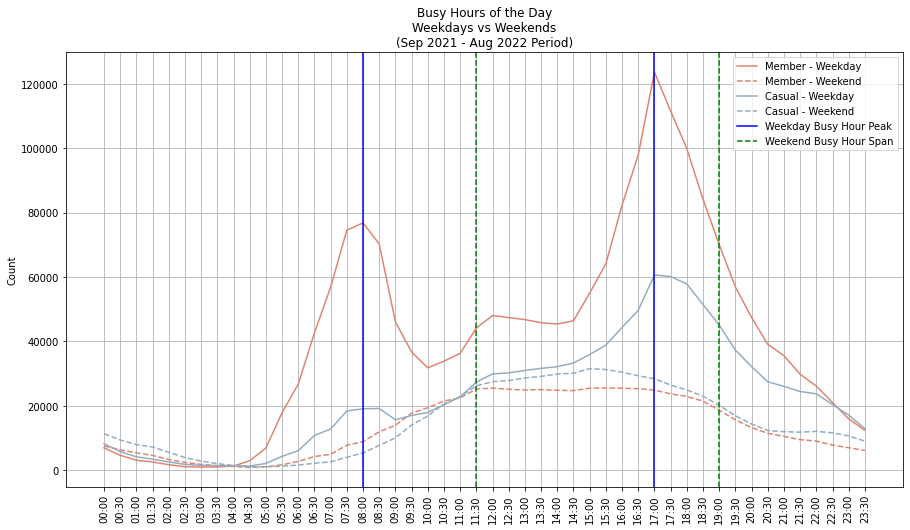

In [93]:
# creating line plots to show at what time members and casuals typically start their trip 
plt.figure(figsize = (15, 8))
plt.plot(member_started_weekday['started_at'].astype('str'), 
         member_started_weekday['Count'],
         color = color_m,
         label = 'Member - Weekday')
plt.plot(member_started_weekend['started_at'].astype('str'), 
         member_started_weekend['Count'],
         color = color_m,
         linestyle = '--',
         label = 'Member - Weekend')
plt.plot(casual_started_weekday['started_at'].astype('str'), 
         casual_started_weekday['Count'],
         color = color_c,
         label = 'Casual - Weekday')
plt.plot(casual_started_weekend['started_at'].astype('str'), 
         casual_started_weekend['Count'],
         color = color_c,
         linestyle = '--',
         label = 'Casual - Weekend')

# vertical lines for weekday busy hour peaks
plt.axvline(x = '17:00',
            color = 'blue',
            label = 'Weekday Busy Hour Peak')
plt.axvline(x = '08:00',
            color = 'blue')

# vertical lines for weekend busy hour span
plt.axvline(x = '11:30',
            color = 'green',
            linestyle = '--',
            label = 'Weekend Busy Hour Span')
plt.axvline(x = '19:00',
            color = 'green',
            linestyle = '--')

# setting plot information
plt.title('Busy Hours of the Day\nWeekdays vs Weekends\n(Sep 2021 - Aug 2022 Period)')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.savefig('Weekdays vs Weekends Busy Hours.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()

#### **c. Each Day**<a class = "anchor" id = "IVc_c"></a>

In [94]:
# creating a dataframe to contain member_casual and the extracted datetime
df_dt = df[['started_at', 'member_casual']]

In [95]:
# extracting day name and time by half an hour for each entry
df_dt = df_dt.assign(day_name = lambda x: x['started_at'] \
                                .dt.strftime('%A'),
                     time_floored = lambda x: x['started_at'] \
                                    .dt.floor('30min') \
                                    .dt.strftime('%H:%M'))

In [96]:
# separating df_dt dataframe for members and casuals
df_dt_member = df_dt[['day_name', 'time_floored']][df_dt['member_casual'] == 'member']
df_dt_casual = df_dt[['day_name', 'time_floored']][df_dt['member_casual'] == 'casual']

In [97]:
# grouping the separated df_dt by day_name and time_floored
df_dt_member_grouped = df_dt_member.groupby(['day_name', 'time_floored']).size()
df_dt_casual_grouped = df_dt_casual.groupby(['day_name', 'time_floored']).size()

In [98]:
# converting the grouped series into dataframes
df_dt_member_grouped = df_dt_member_grouped.to_frame().reset_index().rename(columns = {0: 'Count'})
df_dt_casual_grouped = df_dt_casual_grouped.to_frame().reset_index().rename(columns = {0: 'Count'})

In [99]:
# creating a list of day names and time stamps
days = calendar.day_name[0:]
timestamps = list(df_dt_member_grouped['time_floored'].unique())

In [100]:
# creating empty lists to store heatmap data
m_hmap_data = []
m_hmap_temp = []
c_hmap_data = []
c_hmap_temp = []

# iterating through days and timestamps to fill the empty lists
for day in days:
    for time in timestamps:
        m_data = df_dt_member_grouped[(df_dt_member_grouped['day_name'] == day) &
                                      (df_dt_member_grouped['time_floored'] == time)]['Count'].iloc[0]
        m_hmap_temp.append(m_data)
        c_data = df_dt_casual_grouped[(df_dt_casual_grouped['day_name'] == day) &
                                      (df_dt_casual_grouped['time_floored'] == time)]['Count'].iloc[0]
        c_hmap_temp.append(c_data)
    m_hmap_data.append(m_hmap_temp)
    c_hmap_data.append(c_hmap_temp)
    m_hmap_temp = []
    c_hmap_temp = []

In [101]:
# creating heatmap
fig = go.Figure(data = go.Heatmap(z = m_hmap_data, 
                                  x = timestamps,
                                  y = days,
                                  colorscale = 'sunsetdark'))

# setting plot information
fig.update_layout(title = {'text': 'Daily Busy Hour Distribution<br>(for Members, Sep 2021 - Aug 2022 Period)',
                           'x': 0.5})
fig.update_xaxes(tickangle = 270)
fig.show()

In [102]:
# creating heatmap
fig = go.Figure(data = go.Heatmap(z = c_hmap_data, 
                                  x = timestamps,
                                  y = days,
                                  colorscale = 'mint'))

# setting plot information
fig.update_layout(title = {'text': 'Daily Busy Hour Distribution<br>(for Casuals, Sep 2021 - Aug 2022 Period)',
                           'x': 0.5})
fig.update_xaxes(tickangle = 270)
fig.show()

### **IVd. Trip Duration**<a class = "anchor" id = "IVd"></a>

#### **a. Preparation: Further Outlier Trimming**<a class = "anchor" id = "IVd_a"></a>

##### **Checking data distribution in trip_duration even further**

In [103]:
# preparing data to plot
trip_member = df['trip_duration'][df['member_casual'] == 'member'].to_list()
trip_casual = df['trip_duration'][df['member_casual'] == 'casual'].to_list()

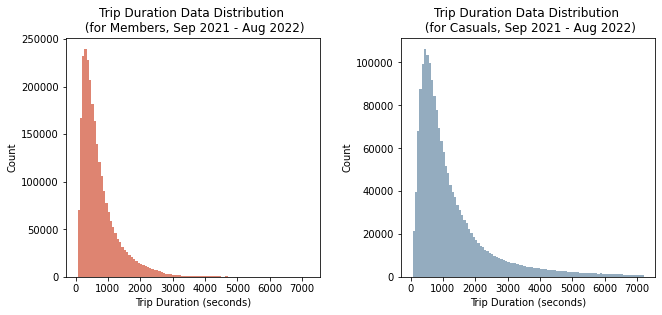

In [104]:
# creating histogram plot to show counts in trip_duration bins for members
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
fig.tight_layout(pad = 5)

axes[0].hist(trip_member, 
             bins = 100,
             color = color_m)
axes[0].set_title('Trip Duration Data Distribution \n (for Members, Sep 2021 - Aug 2022)')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Trip Duration (seconds)')

axes[1].hist(trip_casual, 
             bins = 100,
             color = color_c)
axes[1].set_title('Trip Duration Data Distribution \n (for Casuals, Sep 2021 - Aug 2022)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Trip Duration (seconds)')
plt.show()

##### **Trimming Outliers in trip_duration to visualize data**

In [105]:
# getting member's trip_duration outliers report
df_member = df[df['member_casual'] == 'member']
outlier_bounds(df_member, 'trip_duration')

,Quantile,trip_duration
Q1,0.25,331.0
Q3,0.75,942.0


IQR of trip_duration : 611.0
1.5 IQR: 916.5 

Outlier lower bound of trip_duration : -585.5
Count of trip_duration lower outliers: 0 

Outlier upper bound of trip_duration : 1858.5
Count of trip_duration upper outliers: 157146


In [106]:
# getting casual's trip_duration outliers report
df_casual = df[df['member_casual'] == 'casual']
outlier_bounds(df_casual, 'trip_duration')

,Quantile,trip_duration
Q1,0.25,511.0
Q3,0.75,1577.0


IQR of trip_duration : 1066.0
1.5 IQR: 1599.0 

Outlier lower bound of trip_duration : -1088.0
Count of trip_duration lower outliers: 0 

Outlier upper bound of trip_duration : 3176.0
Count of trip_duration upper outliers: 142211


In [107]:
# trimming outliers
# note: lower outliers have previously been omitted in the data engineering phase

# for members
trip_member = df['trip_duration'][(df['trip_duration'] < 1859) & 
                                  (df['member_casual'] == 'member')].to_list()
trip_member = [i / 60 for i in trip_member] # converting to minute

# for casuals
trip_casual = df['trip_duration'][(df['trip_duration'] < 3176) & 
                                  (df['member_casual'] == 'casual')].to_list()
trip_casual = [i / 60 for i in trip_casual] # converting to minute

#### **b. Member vs. Casual (Separated)**<a class = "anchor" id = "IVd_b"></a>

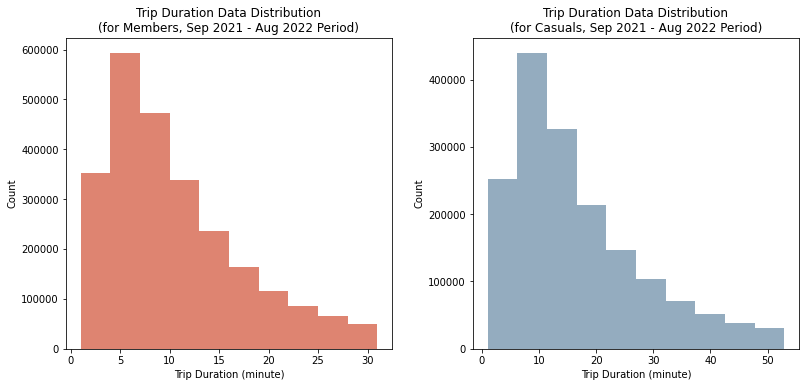

In [108]:
# creating histogram plot to show counts in trip_duration bins for members
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
fig.tight_layout(pad = 5)

# for members
axes[0].hist(trip_member, 
             bins = 10,
             color = color_m)
axes[0].set_title('Trip Duration Data Distribution\n(for Members, Sep 2021 - Aug 2022 Period)')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Trip Duration (minute)')

# for casuals
axes[1].hist(trip_casual, 
             bins = 10,
             color = color_c)
axes[1].set_title('Trip Duration Data Distribution\n(for Casuals, Sep 2021 - Aug 2022 Period)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Trip Duration (minute)')

# saving plots
fig.savefig('Trip Duration Data Distribution (Separated).jpeg', dpi = 300, bbox_inches = 'tight')

# displaying plots
plt.show()

Both members and casuals show a really similar trip_duration data distribution shape. The following histogram is to show when the two of them displayed on a same chart to make it easier when comparing their bins and counts. 

#### **c. Member vs. Casual (Combined)**<a class = "anchor" id = "IVd_c"></a>

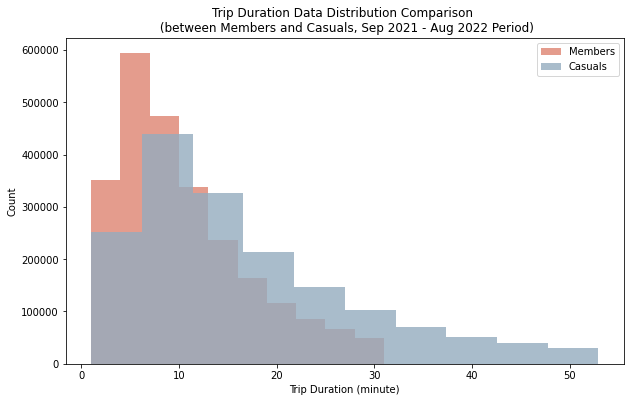

In [109]:
# creating histogram plot to show counts in trip_duration bins for members
plt.figure(figsize = (10, 6))

# for members
plt.hist(trip_member, 
         bins = 10,
         color = color_m,
         alpha = 0.8,
         label = 'Members')

# for casuals
plt.hist(trip_casual, 
         bins = 10,
         color = color_c,
         alpha = 0.8,
         label = 'Casuals')

# setting plot labels
plt.title('Trip Duration Data Distribution Comparison \n (between Members and Casuals, Sep 2021 - Aug 2022 Period)')
plt.xlabel('Trip Duration (minute)')
plt.ylabel('Count')
plt.legend()
plt.savefig('Trip Duration Data Distribution (Combined).jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()

### **IVe. Busiest Stations**<a class = "anchor" id = "IVe"></a>

#### **a. Preparation: Pivoting Data**<a class = "anchor" id = "IVe_a"></a>

In [110]:
# top 25 starting stations for members
start_sta_coor_m = df[df['member_casual'] == 'member'] \
                   .groupby(['start_station_name']) \
                   .agg({'start_station_name': 'size', 
                         'start_lat': 'mean', 
                         'start_lng': 'mean'}) \
                   .rename(columns = {'start_station_name': 'count'}) \
                   .reset_index() \
                   .rename(columns = {0: 'Count'})\
                   .sort_values('count', 
                                ascending = False)[:25] \
                   .sort_values('count', 
                                ascending = True, 
                                ignore_index = True)

# top 25 ending stations for members
end_sta_coor_m = df[df['member_casual'] == 'member'] \
                   .groupby(['end_station_name']) \
                   .agg({'end_station_name': 'count', 
                         'end_lat': 'mean', 
                         'end_lng': 'mean'}) \
                   .rename(columns = {'end_station_name': 'count'}) \
                   .reset_index() \
                   .rename(columns = {0: 'Count'})\
                   .sort_values('count', 
                                ascending = False)[:25] \
                   .sort_values('count', 
                                ascending = True, 
                                ignore_index = True)

# top 25 starting stations for casuals
start_sta_coor_c = df[df['member_casual'] == 'casual'] \
                   .groupby(['start_station_name']) \
                   .agg({'start_station_name': 'count', 
                         'start_lat': 'mean', 
                         'start_lng': 'mean'}) \
                   .rename(columns = {'start_station_name': 'count'}) \
                   .reset_index() \
                   .rename(columns = {0: 'Count'})\
                   .sort_values('count', 
                                ascending = False)[:25] \
                   .sort_values('count', 
                                ascending = True, 
                                ignore_index = True)

# top 25 ending stations for casuals
end_sta_coor_c = df[df['member_casual'] == 'casual'] \
                   .groupby(['end_station_name']) \
                   .agg({'end_station_name': 'count', 
                         'end_lat': 'mean', 
                         'end_lng': 'mean'}) \
                   .rename(columns = {'end_station_name': 'count'}) \
                   .reset_index() \
                   .rename(columns = {0: 'Count'})\
                   .sort_values('count', 
                                ascending = False)[:25] \
                   .sort_values('count', 
                                ascending = True, 
                                ignore_index = True)

#### **b. Top 25 Starting Stations for Members**<a class = "anchor" id = "IVe_b"></a>

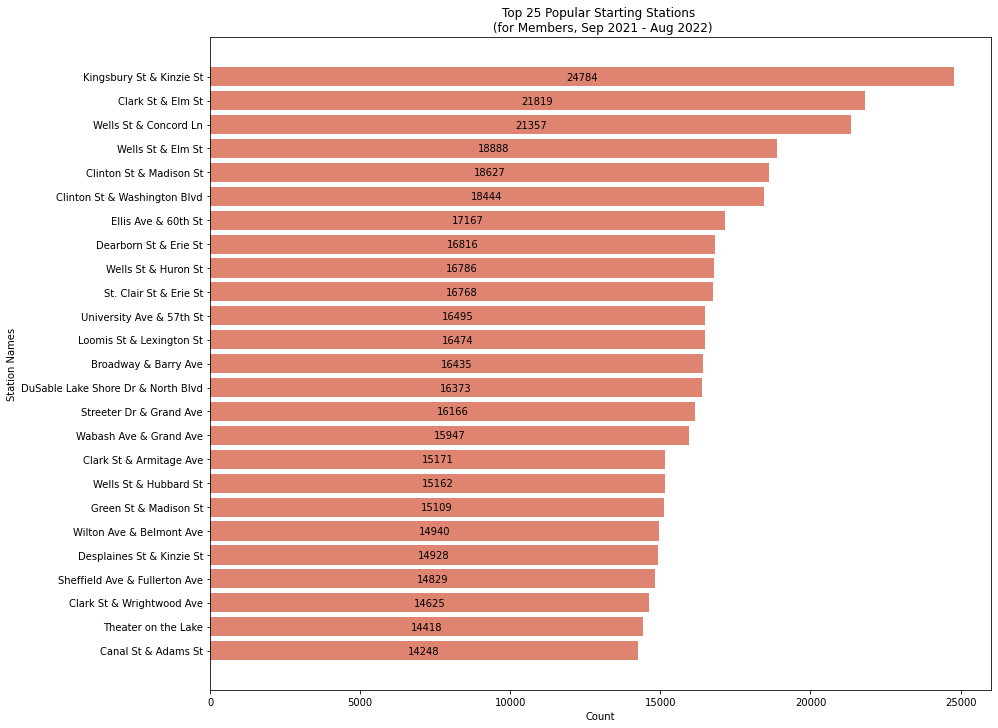

In [111]:
#creating a horizontal bar plot to display top 25 starting station names for members
plt.figure(figsize = (14, 12))
ax = plt.barh(start_sta_coor_m['start_station_name'],
              start_sta_coor_m['count'],
              color = color_m)

# setting plot information
plt.title('Top 25 Popular Starting Stations \n (for Members, Sep 2021 - Aug 2022)')
plt.xlabel('Count')
plt.ylabel('Station Names')

# creating count data labels
rects = ax.patches
labels = start_sta_coor_m['count'].to_list()
for rect, label in zip(rects, labels):
    width = rect.get_width()
    plt.text(width / 2,
             rect.get_y() + 0.18,
             int(label),
             ha = 'center',
             va = 'bottom',
             color = 'black')
    
# saving plot
plt.savefig('Top 25 Popular Starting Stations (Members).jpeg', dpi = 300, bbox_inches = 'tight')

# showing plot
plt.show()

#### **c. Top 25 Ending Stations for Members**<a class = "anchor" id = "IVe_c"></a>

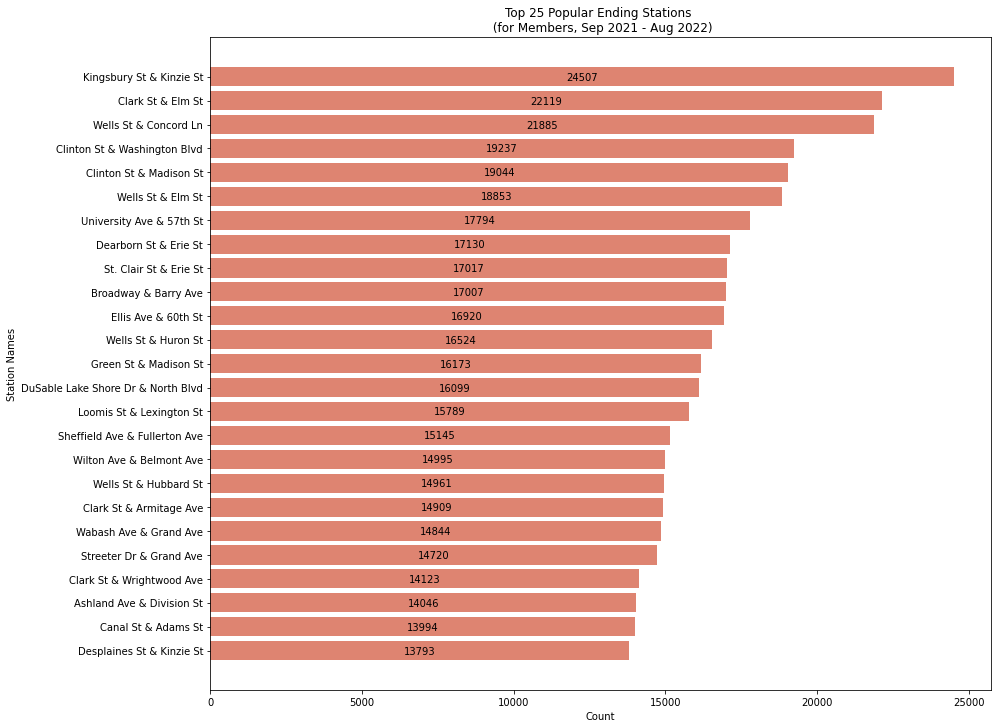

In [112]:
#creating a horizontal bar plot to display top 25 ending station names for members
plt.figure(figsize = (14, 12))
ax = plt.barh(end_sta_coor_m['end_station_name'],
              end_sta_coor_m['count'],
              color = color_m)

# setting plot information
plt.title('Top 25 Popular Ending Stations \n (for Members, Sep 2021 - Aug 2022)')
plt.xlabel('Count')
plt.ylabel('Station Names')

# creating count data labels
rects = ax.patches
labels = end_sta_coor_m['count'].to_list()
for rect, label in zip(rects, labels):
    width = rect.get_width()
    plt.text(width / 2,
             rect.get_y() + 0.18,
             int(label),
             ha = 'center',
             va = 'bottom',
             color = 'black')
    
# saving plot
plt.savefig('Top 25 Popular Ending Stations (Members).jpeg', dpi = 300, bbox_inches = 'tight')

# showing plot
plt.show()

#### **d. Top 25 Starting Stations for Casuals**<a class = "anchor" id = "IVe_d"></a>

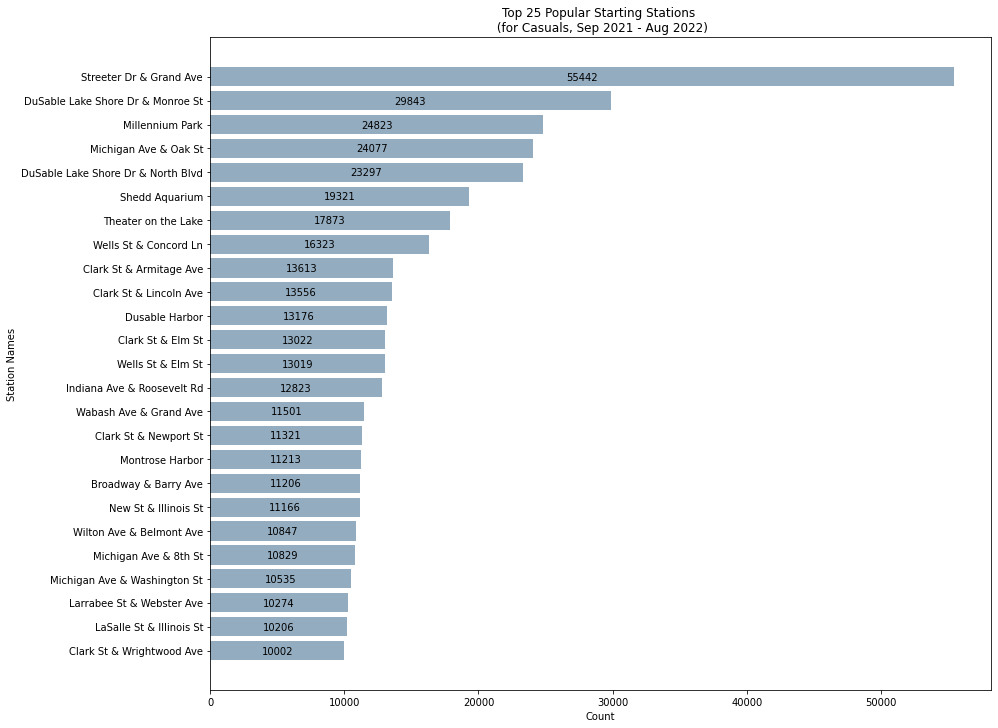

In [113]:
#creating a horizontal bar plot to display top 25 starting station names for casuals
plt.figure(figsize = (14, 12))
ax = plt.barh(start_sta_coor_c['start_station_name'],
              start_sta_coor_c['count'],
              color = color_c)

# setting plot information
plt.title('Top 25 Popular Starting Stations \n (for Casuals, Sep 2021 - Aug 2022)')
plt.xlabel('Count')
plt.ylabel('Station Names')

# creating count data labels
rects = ax.patches
labels = start_sta_coor_c['count'].to_list()
for rect, label in zip(rects, labels):
    width = rect.get_width()
    plt.text(width / 2,
             rect.get_y() + 0.18,
             int(label),
             ha = 'center',
             va = 'bottom',
             color = 'black')
    
# saving plot
plt.savefig('Top 25 Popular Starting Stations (Casuals).jpeg', dpi = 300, bbox_inches = 'tight')

# showing plot
plt.show()

#### **e. Top 25 Ending Stations for Casuals**<a class = "anchor" id = "IVe_e"></a>

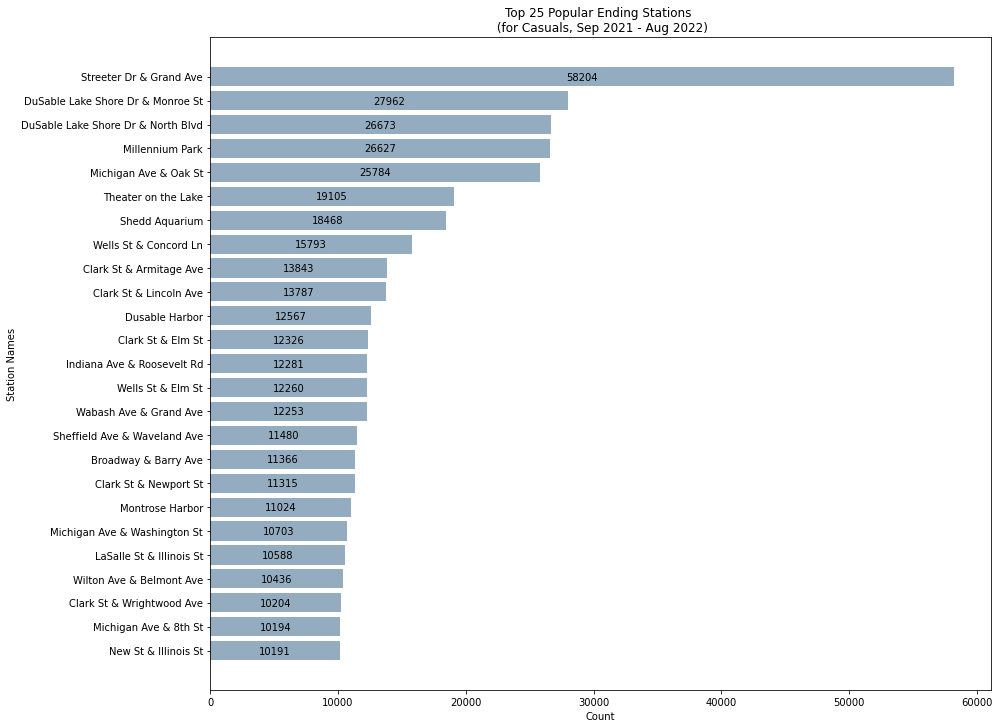

In [114]:
#creating a horizontal bar plot to display top 25 ending station names for casuals
plt.figure(figsize = (14, 12))
ax = plt.barh(end_sta_coor_c['end_station_name'],
              end_sta_coor_c['count'],
              color = color_c)

# setting plot information
plt.title('Top 25 Popular Ending Stations \n (for Casuals, Sep 2021 - Aug 2022)')
plt.xlabel('Count')
plt.ylabel('Station Names')

# creating count data labels
rects = ax.patches
labels = end_sta_coor_c['count'].to_list()
for rect, label in zip(rects, labels):
    width = rect.get_width()
    plt.text(width / 2,
             rect.get_y() + 0.18,
             int(label),
             ha = 'center',
             va = 'bottom',
             color = 'black')
    
# saving plot
plt.savefig('Top 25 Popular Ending Stations (Casuals).jpeg', dpi = 300, bbox_inches = 'tight')

# showing plot
plt.show()

### **IVf. Busiest Stations Mapping**<a class = "anchor" id = "IVf"></a>

#### **a. Busiest Stations**<a class = "anchor" id = "IVf_a"></a>

In [115]:
# zipping latitude and longitude points of the busiest stations
top25_start_sta_m = list(zip(start_sta_coor_m['start_lat'], start_sta_coor_m['start_lng']))
top25_end_sta_m = list(zip(end_sta_coor_m['end_lat'], end_sta_coor_m['end_lng']))
top25_start_sta_c = list(zip(start_sta_coor_c['start_lat'], start_sta_coor_c['start_lng']))
top25_end_sta_c = list(zip(end_sta_coor_c['end_lat'], end_sta_coor_c['end_lng']))

In [116]:
# setting background map
m = folium.Map(location = [41.894317, -87.622772], # map starting pane coordinate
               prefer_canvas = True)

# plotting top 25 ending stations for members
for coord in top25_start_sta_m:
    folium.Marker(location = [coord[0], coord[1]],
                  icon = folium.Icon(color = 'orange',
                                     icon = 'fa-play',
                                     prefix = 'fa')).add_to(m)
    
# plotting top 25 ending stations for members
for coord in top25_end_sta_m:
    folium.CircleMarker(location = [coord[0], coord[1]],
                        fill = True,
                        fill_color = 'orange',
                        fill_opacity = 0.7,
                        color = color_m,
                        radius = 10).add_to(m)
    
# plotting top 25 ending stations for members
for coord in top25_start_sta_c:
    folium.Marker(location = [coord[0], coord[1]],
                  icon = folium.Icon(color = 'cadetblue',
                                     icon = 'fa-play',
                                     prefix = 'fa')).add_to(m)
    
# plotting top 25 ending stations for members
for coord in top25_end_sta_c:
    folium.CircleMarker(location = [coord[0], coord[1]],
                        fill = True,
                        fill_color = 'cadetblue',
                        fill_opacity = 0.7,
                        color = color_c,
                        radius = 10).add_to(m)
    
# plotting Chicago downtown area
folium.Circle(location = [41.8816, -87.6301],
              fill = True,
              fill_color = 'blue',
              fill_opacity = 0.1,
              color = 'blue',
              radius = 3500).add_to(m)

# setting map zooming based on its data coordinate bounds
m.fit_bounds(m.get_bounds())

# displaying map
m

#### **b. Busiest Stations Shared by Both Members and Casuals**<a class = "anchor" id = "IVf_b"></a>

In [117]:
# getting the busy starting station names for both members and casuals
busy_start_sta_mc = list(set(start_sta_coor_m['start_station_name'].to_list()) \
                         .intersection(start_sta_coor_c['start_station_name'].to_list()))

# completing the busy starting stations with their lat and lng
busy_start_sta_mc = start_sta_coor_m[start_sta_coor_m['start_station_name'] \
                                     .isin(busy_start_sta_mc)]

# zipping the lat and lng of busy starting stations
busy_start_sta_mc = list(zip(busy_start_sta_mc['start_lat'], busy_start_sta_mc['start_lng']))

# getting the busy ending station names for both members and casuals
busy_end_sta_mc = list(set(end_sta_coor_m['end_station_name'].to_list()) \
                       .intersection(end_sta_coor_c['end_station_name'].to_list()))

# completing the busy ending stations with their lat and lng
busy_end_sta_mc = end_sta_coor_m[end_sta_coor_m['end_station_name'] \
                                     .isin(busy_end_sta_mc)]

# zipping the lat and lng of busy starting stations
busy_end_sta_mc = list(zip(busy_end_sta_mc['end_lat'], busy_end_sta_mc['end_lng']))

In [118]:
# setting background map
m = folium.Map(location = [41.894317, -87.622772], # map starting pane coordinate
               prefer_canvas = True)

# plotting top 10 ending stations for members
for coord in busy_start_sta_mc:
    folium.Marker(location = [coord[0], coord[1]],
                  icon = folium.Icon(color = 'green',
                                     icon = 'fa-play',
                                     prefix = 'fa')).add_to(m)
    
# plotting top 10 ending stations for members
for coord in busy_end_sta_mc:
    folium.CircleMarker(location = [coord[0], coord[1]],
                        fill = True,
                        fill_color = 'red',
                        fill_opacity = 0.7,
                        color = 'red',
                        radius = 10).add_to(m)
    
# plotting Chicago downtown area
folium.Circle(location = [41.8816, -87.6301],
              fill = True,
              fill_color = 'blue',
              fill_opacity = 0.1,
              color = 'blue',
              radius = 3500).add_to(m)
    
# setting map zooming based on its data coordinate bounds
m.fit_bounds(m.get_bounds())

# displaying the map
m

### **IVg. Most Popular Routes**<a class = "anchor" id = "IVg"></a>

#### **a. Preparation: Pivoting Data**<a class = "anchor" id = "IVg_a"></a>

In [119]:
# getting top 10 popular routes for members
member_route = df[df['member_casual'] == 'member'] \
               .groupby([df['start_station_name'], df['end_station_name']]) \
               .size() \
               .sort_values(ascending = False)[:10]

# getting top 10 popular routes for casuals
casual_route = df[df['member_casual'] == 'casual'] \
               .groupby([df['start_station_name'], df['end_station_name']]) \
               .size() \
               .sort_values(ascending = False)[:10]

In [120]:
# separating station names and their counts to reformat the station names 
member_route_station = member_route.index.to_list()
member_route_count = member_route.to_list()
casual_route_station = casual_route.index.to_list()
casual_route_count = casual_route.to_list()

# combining start and end stations to become routes
member_route_station = [(member_route_station[i][0] + \
                         ' to ' + \
                         member_route_station[i][1]) for i in range(len(member_route_station))]
casual_route_station = [(casual_route_station[i][0] + \
                         ' to ' + \
                         casual_route_station[i][1]) for i in range(len(casual_route_station))]

# transforming back into Pandas Series object
member_route = pd.Series(index = member_route_station, 
                         data = member_route_count).sort_values()
casual_route = pd.Series(index = casual_route_station, 
                         data = casual_route_count).sort_values()

#### **b. Top 10 Popular Routes for Members**<a class = "anchor" id = "IVg_b"></a>

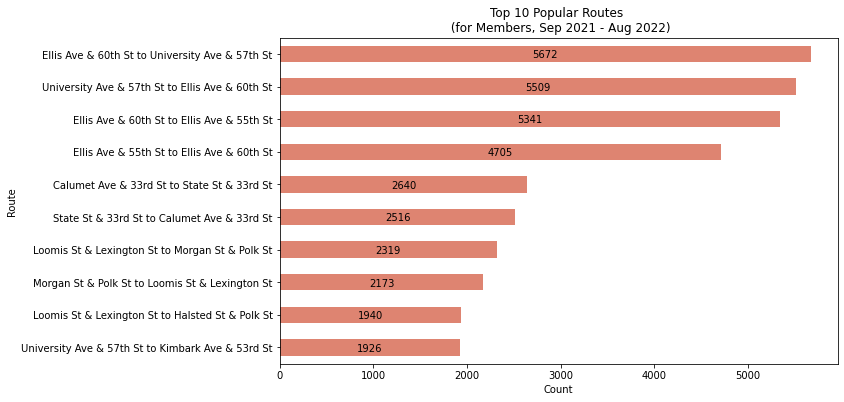

In [121]:
# creating a horizontal bar plot to display top 10 trips for members
plt.figure(figsize = (10, 6))
ax = member_route.plot(kind = 'barh',
                       color = color_m)

# setting plot information
plt.title('Top 10 Popular Routes \n (for Members, Sep 2021 - Aug 2022)')
plt.xlabel('Count')
plt.ylabel('Route')

# creating count data labels
rects = ax.patches
labels = member_route.to_list()
for rect, label in zip(rects, labels):
    width = rect.get_width()
    plt.text(width / 2,
             rect.get_y() + 0.075,
             int(label),
             ha = 'center',
             va = 'bottom',
             color = 'black')
# saving plot
plt.savefig('Top 10 Popular Routes (Members).jpeg', dpi = 300, bbox_inches = 'tight')

# showing plot
plt.show()

#### **c. Top 10 Popular Routes for Casuals**<a class = "anchor" id = "IVg_c"></a>

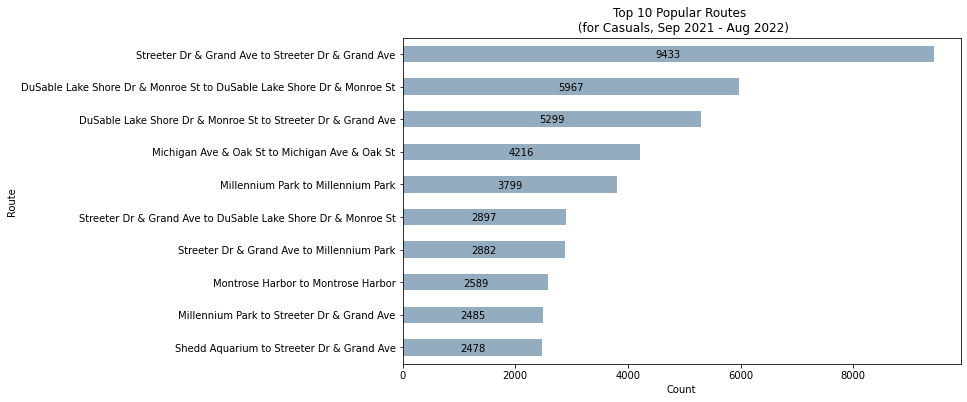

In [122]:
# creating a horizontal bar plot to display top 10 trips for casuals
plt.figure(figsize = (10, 6))
ax = casual_route.plot(kind = 'barh',
                       color = color_c)

# setting plot information
plt.title('Top 10 Popular Routes \n (for Casuals, Sep 2021 - Aug 2022)')
plt.xlabel('Count')
plt.ylabel('Route')

# creating count data labels
rects = ax.patches
labels = casual_route.to_list()
for rect, label in zip(rects, labels):
    width = rect.get_width()
    plt.text(width / 2,
             rect.get_y() + 0.075,
             int(label),
             ha = 'center',
             va = 'bottom',
             color = 'black')
    
# saving plot
plt.savefig('Top 10 Popular Routes (Casuals).jpeg', dpi = 300, bbox_inches = 'tight')

# showing plot
plt.show()

#### **d. Popular Routes Shared by both Members and Casuals**<a class = "anchor" id = "IVg_d"></a>

In [123]:
# checking if there are any popular routes that are shared between members and casuals
shared_pop_routes = list(set(member_route.index.to_list()).intersection(casual_route.index.to_list()))
print('Shared popular routes:', shared_pop_routes)

Shared popular routes: []


## **V. Summary and Recommendations**<a class = "anchor" id = "V"></a>

### **Va. Summary**<a class = "anchor" id = "Va"></a>

#### **a. Types of Bike**<a class = "anchor" id = "Va_a"></a>

* The **type of bike** that are most popular, both for members and casuals are the **classic bikes**, accounting for **63.61%** of total trip counts, with electric bikes went below it. 
* Members and casuals share **similar trends of interest** for classic bikes and electric bikes usage. 

#### **b. Seasonality**<a class = "anchor" id = "Va_b"></a>

* **Both** members and casuals have **increase** in their trips during **midyear or summer months**, from May until October, with June until September as the peak.
* The casuals who use the bike-share service during busy months May until October are **more than 50%** the members, displaying a more **similiar behaviour** between the two groups of customers in these busy months.

#### **c. Busy Hours**<a class = "anchor" id = "Va_c"></a>

* Members ride on **weekdays more** than on weekends, while casuals ride on **weekends more** than on weekdays.
* The **busy hours on weekdays** for members are **in the morning** around 05:30 to 09:00, peaking at **08:00** and **in the evening** around 15:30 - 20:00, peaking at **17:00**, while for casuals is **in the evening** around 16:30 - 19:00, peaking at **17:00**.
* The **busy hours on weekends** both for members and casuals is spreadout from morning around 09:30 until evening around 19:00, with **11:30** being the peak for members and **15:00** being the peak for casuals.

#### **d. Trip Duration**<a class = "anchor" id = "Va_d"></a>

* Casuals tend to **ride longer** than members, though only for a small margin, around 10 minutes more in average. Most members ride for around **10 minutes**, while casuals ride for around **20 minutes**.
* Based on the trip duration average values, members and casuals mainly use the bike-share service for **commutes**, not for prolonged trips.

#### **e. Busiest Stations and Popular Routes**<a class = "anchor" id = "Va_e"></a>

* Most of the busiest 25 starting stations and 25 ending stations for **Members** are clustered around **Chicago downtown area**, with **2** starting stations and **2** ending stations located around the **University of Chicago**. Downtown Chicago is known for its vibrant **urban life style**, including live music and many restaurants.
* The busiest 25 starting stations and 25 ending stations for **casuals** are spreadout longitudinally parallel to the shore **Across Chicago downtown area and north of it**. Some notable station concentrations are clustered around **Lincoln Park Zoo**, **North Avenue Beach**, and **Chicago Grant Park**.
* Among those busiest stations, there are **11 starting stations** and **10 ending stations** which are shared by **both** members and casuals. These stations are clustered longitudinally parallel to the shore on the more **northern part of Chicago downtown area**. Most of these stations are located either around downtown attractions, such as **restaurant and cafe complexes**, or **Lincoln Park Zoo and North Avenue Beach**.
* There is **no** single route that overlaps between the 10 busiest routes for members and 10 busiest routes for casuals.


Note:
Chicago Loop and the area around it are considered as downtown are in this analysis.

### **Vb. Recommendations and Outro**<a class = "anchor" id = "Vb"></a>

#### **a. Top 3 Recommendations**<a class = "anchor" id = "Vb_a"></a>

Top 3 recommendations to help the marketing team convert casuals to become members:
1. Give explanation to casuals, either by app push notifications or by social media ads, on how be turning into a Cyclistic member can benefit them in trimming commute cost and making their trips easier, especially during evening rush hour and on weekends, since these are the times casuals most use the bike-share service. 
2. Partner with local restaurants and famous landmarks around the busiest stations by offering the casuals some discount coupons if they turn into Cyclistic members, since these are what mostly surround the busiest stations.
3. Allocate the budget expense on busy midyear months, from May to October, peaking at June to September, around 2-3 times more than on other non-busy months, since these midyear months may account for 75% of total bike-share usage or around 3 times during non-busy months.


Note:
These recommendations can be implemented simultaneously and may even yield a more effective result.

#### **b. Further Data Ideas to Develop the Project**<a class = "anchor" id = "Vb_b"></a>

For an even more powerful data analysis, it would be really nice if I could use some more data about:
* Earlier datasets dating back some more years, so I can draw a more reliable insight regarding the seasonality.
* Customer data, so that I can better understand the customer segmentation and each of their behavior. With this data, I can better know the majority occupation of members and casuals and understand what they use the bike-share service for, what kind of destinations they visit on certain months, and more.
* Membership cost and trip cost, so that I can make a more convincing calculation and comparison on how becoming a member may benefit the customers (or may not, depending on the cicumstances presented by the data).
* Survey data regarding what kind of destinations the customers like to visit using the bike-share service.
* A non-null and accurate pairs of station Ids and their names.
* Popular landmarks around Chicago.

#### **c. Outro**<a class = "anchor" id = "Vb_c"></a>

And so, we are now done with this exciting data analysis project. Thank you for your time and attention in following me navigating through the data. Hope we all can gather insights from this and see you again on my other projects!